In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing API to connect to NFL data sources like nflfastR, nfldata, dynastyprocess, and Draft Scout.
import nfl_data_py as nfl 

In [81]:
# bringing back in data frames ff_all and ff_collective

# ff_all = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv", index_col = 0,
                   # low_memory = False)
ff_collective = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv", low_memory = False,
                            index_col = 0)

In [82]:
# making all cols lower case

# ff_all.columns = map(str.lower, ff_all.columns)
ff_collective.columns = map(str.lower, ff_collective.columns)


In [83]:
ff_collective.loc[ff_collective.season == 2023]

team       player_name position player_id_x  height  weight  years_exp  \
1459  NaN        Colt McCoy       QB         NaN     NaN     NaN        NaN   
1460  NaN      Jeff Driskel       QB         NaN     NaN     NaN        NaN   
1461  NaN      Kyler Murray       QB         NaN     NaN     NaN        NaN   
1462  NaN      David Blough       QB         NaN     NaN     NaN        NaN   
1463  NaN      Clayton Tune       QB         NaN     NaN     NaN        NaN   
...   ...               ...      ...         ...     ...     ...        ...   
2445  NaN     Kazmeir Allen       WR         NaN     NaN     NaN        NaN   
2446  NaN       Zion Bowens       WR         NaN     NaN     NaN        NaN   
2447  NaN      Jalen Sample       WR         NaN     NaN     NaN        NaN   
2448  NaN  Mitchell Tinsley       WR         NaN     NaN     NaN        NaN   
2449  NaN   Brycen Tremayne       WR         NaN     NaN     NaN        NaN   

       tm  pos  age   g  gs  tgt  rec  passingyds  passingtd  passingatt  \
1459  ARI  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1460  ARI  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1461  ARI  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1462  ARI  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1463  ARI  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
...   ...  ...  ...  ..  ..  ...  ...         ...        ...         ...   
2445  WAS  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2446  WAS  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2447  WAS  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2448  WAS  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2449  WAS  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   

      rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
1459         NaN        NaN         NaN           NaN          NaN   
1460         NaN        NaN         NaN           NaN          NaN   
1461         NaN        NaN         NaN           NaN          NaN   
1462         NaN        NaN         NaN           NaN          NaN   
1463         NaN        NaN         NaN           NaN          NaN   
...          ...        ...         ...           ...          ...   
2445         NaN        NaN         NaN           NaN          NaN   
2446         NaN        NaN         NaN           NaN          NaN   
2447         NaN        NaN         NaN           NaN          NaN   
2448         NaN        NaN         NaN           NaN          NaN   
2449         NaN        NaN         NaN           NaN          NaN   

      fantasypoints  int  fumbles  fumbleslost  adp name  season_x  \
1459            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1460            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1461            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1462            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1463            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
...             ...  ...      ...          ...  ...  ...       ...   
2445            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2446            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2447            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2448            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2449            NaN  NaN      NaN          NaN  NaN  NaN       NaN   

     full_name_x  season_y club_code  depth_team depth_lvl gsis_id_x  \
1459         NaN       NaN       NaN         NaN       NaN       NaN   
1460         NaN       NaN       NaN         NaN       NaN       NaN   
1461         NaN       NaN       NaN         NaN       NaN       NaN   
1462         NaN       NaN       NaN         NaN       NaN       NaN   
1463         NaN       NaN       NaN         NaN       NaN       NaN   
...          ...       ...   

# FF Collective initial EDA, further cleaning, feature engineering

In [84]:
# take a look at sample of the data, make sure everything looks 

pd.set_option('display.max_columns', None)
ff_collective.sample(7)

team      player_name position player_id_x  height  weight  years_exp  \
596   MIN       Chad Beebe       WR  00-0034309    70.0   185.0        2.0   
319    SF  Kendrick Bourne       WR  00-0033307    73.0   203.0        2.0   
485    GB      A.J. Dillon       RB  00-0036265    72.0   250.0        0.0   
874   HOU    Royce Freeman       RB  00-0034838    72.0   238.0        3.0   
1287   LA        Cam Akers       RB  00-0036414    70.0   212.0        2.0   
2368  NaN      Kevin Rader       TE         NaN     NaN     NaN        NaN   
595   MIN     Adam Thielen       WR  00-0030035    74.0   200.0        7.0   

       tm  pos   age     g    gs    tgt   rec  passingyds  passingtd  \
596   MIN   WR  26.0  14.0   0.0   30.0  20.0         0.0        0.0   
319   SFO   WR  24.0  16.0   0.0   44.0  30.0         0.0        0.0   
485   NaN  NaN   NaN   NaN   NaN    NaN   NaN         NaN        NaN   
874   2TM   RB  25.0  15.0   0.0   16.0  10.0         0.0        0.0   
1287  LAR   RB  23.0  15.0   9.0   18.0  13.0         0.0        0.0   
2368  TEN  NaN   NaN   NaN   NaN    NaN   NaN         NaN        NaN   
595   MIN   WR  30.0  15.0  15.0  108.0  74.0         0.0        0.0   

      passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
596          0.0         0.0        0.0         0.0         201.0   
319          0.0         0.0        0.0         0.0         358.0   
485          NaN         NaN        NaN         NaN           NaN   
874          0.0       169.0        0.0        56.0          77.0   
1287         0.0       786.0        7.0       188.0         117.0   
2368         NaN         NaN        NaN         NaN           NaN   
595          0.0        15.0        0.0         3.0         925.0   

      receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
596           2.0           30.0  0.0      2.0          1.0    NaN   
319           5.0           95.8  0.0      0.0          0.0    NaN   
485           NaN            NaN  NaN      NaN          NaN  129.0   
874           0.0           25.0  0.0      0.0          0.0    NaN   
1287          0.0          128.0  0.0      2.0          2.0   31.0   
2368          NaN            NaN  NaN      NaN          NaN    NaN   
595          14.0          180.0  0.0      0.0          0.0   31.0   

              name  season_x      full_name_x  season_y club_code  depth_team  \
596            NaN    2020.0       Chad Beebe    2020.0       MIN         2.0   
319            NaN    2019.0  Kendrick Bourne    2019.0        SF         2.0   
485    A.J. Dillon    2020.0      A.J. Dillon    2020.0        GB         3.0   
874            NaN    2021.0    Royce Freeman    2021.0       CAR         3.0   
1287     Cam Akers    2022.0        Cam Akers    2022.0        LA         2.0   
2368           NaN       NaN              NaN       NaN       NaN         NaN   
595   Adam Thielen    2020.0     Adam Thielen    2020.0       MIN         1.0   

     depth_lvl   gsis_id_x depth_position  cmp   y/a  y/r  totaltds_22  2pm  \
596   2nd team  00-0034309             PR  NaN   NaN  NaN          NaN  NaN   
319   2nd team  00-0033307             WR  NaN   NaN  NaN          NaN  NaN   
485   3rd team  00-0036265         \n      NaN   NaN  NaN          NaN  NaN   
874   3rd team  00-0034838             RB  NaN   NaN  NaN          NaN  NaN   
1287  2nd team  00-0036414             RB  0.0  4.18  9.0          7.0  NaN   
2368       NaN         NaN            NaN  NaN   NaN  NaN          NaN  NaN   
595    starter  00-0030035             WR  NaN   NaN  NaN          NaN  NaN   

      2pp    ppr   dkpt   fdpt  vbd  posrank  season player_display_name  \
596   NaN    NaN    NaN    NaN  NaN      NaN  2020.0          Chad Beebe   
319   NaN    NaN    NaN    NaN  NaN      NaN  2019.0     Kendrick Bourne   
485   NaN    NaN    NaN    NaN  NaN      NaN  2020.0         A.J. Dillon   
874   NaN    NaN    NaN    NaN  NaN      NaN  2021.0       Royce Freeman   
1287  NaN  141.3  149.3  13

In [85]:
ff_collective.describe()

height       weight    years_exp          age            g  \
count  1459.000000  1459.000000  1459.000000  1431.000000  1431.000000   
mean     73.252913   215.919808     3.769705    26.245283    12.573026   
std       2.831054    21.692603     3.417319     3.571733     4.331388   
min      66.000000   153.000000     0.000000    21.000000     1.000000   
25%      71.000000   200.000000     1.000000    24.000000    10.000000   
50%      73.000000   215.000000     3.000000    26.000000    14.000000   
75%      76.000000   227.000000     5.000000    28.000000    16.000000   
max      80.000000   270.000000    22.000000    45.000000    17.000000   

                gs          tgt          rec   passingyds    passingtd  \
count  1431.000000  1431.000000  1431.000000  1431.000000  1431.000000   
mean      7.619846    43.347310    29.064990   358.909853     2.259958   
std       5.590151    39.904172    27.034877  1027.265278     6.945507   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    10.500000     7.000000     0.000000     0.000000   
50%       7.000000    35.000000    24.000000     0.000000     0.000000   
75%      13.000000    65.000000    43.500000     0.000000     0.000000   
max      17.000000   191.000000   149.000000  5316.000000    48.000000   

        passingatt   rushingyds    rushingtd   rushingatt  receivingyds  \
count  1431.000000  1431.000000  1431.000000  1431.000000   1431.000000   
mean     50.107617   158.740042     1.276031    35.974843    326.491964   
std     140.836679   294.685414     2.627180    64.638105    339.512810   
min       0.000000   -15.000000     0.000000     0.000000    -10.000000   
25%       0.000000     0.000000     0.000000     0.000000     55.500000   
50%       0.000000    13.000000     0.000000     3.000000    224.000000   
75%       0.000000   160.500000     1.000000    41.000000    477.000000   
max     733.000000  2027.000000    18.000000   378.000000   1947.000000   

       receivingtd  fantasypoints          int      fumbles  fumbleslost  \
count  1431.000000    1431.000000  1431.000000  1431.000000  1431.000000   
mean      2.021663      95.596618     1.134172     1.457722     0.685535   
std       2.588075      80.807263     3.208625     2.400057     1.181587   
min       0.000000      -1.460000     0.000000     0.000000     0.000000   
25%       0.000000      35.000000     0.000000     0.000000     0.000000   
50%       1.000000      72.000000     0.000000     1.000000     0.000000   
75%       3.000000     136.000000     0.000000     2.000000     1.000000   
max      18.000000     469.200000    30.000000    18.000000    11.000000   

              adp     season_x     season_y   depth_team         cmp  \
count  596.000000  1459.000000  1282.000000  1282.000000  346.000000   
mean    84.137584  2020.496916  2020.484399     1.608424   33.028902   
std     54.219980     1.105770     1.112061     0.722899   90.784499   
min      1.000000  2019.000000  2019.000000     1.000000    0.000000   
25%     39.000000  2020.000000  2020.000000     1.000000    0.000000   
50%     79.000000  2020.000000  2020.000000     1.000000    0.000000   
75%    121.000000  2021.000000  2021.000000     2.000000    0.000000   
max    222.000000  2022.000000  2022.000000     3.000000  490.000000   

              y/a         y/r  totaltds_22        2pm        2pp         ppr  \
count  234.000000  282.000000   346.000000  48.000000  22.000000  346.000000   
mean     4.279402   10.417092     3.173410   1.083333   1.681818  117.508671   
std      3.210997    3.858111     3.218423   0.279310   0.779888   87.853855   
min     -7.500000   -6.000000     0.000000   1.000000   1.000000    1.800000   
25%      2.872500    8.010000     1.000000   1.000000   1.000000   46.775000   
50%      4.185000   10.255000     2.000000   1.000000   1.500000   97.500000   
75%      5.307500   12.750000     5.000000   1.000000   2.000000  168.550000   
max     18.500000   22.00000

We should create some type of cutoff for amount of games played, and keep track of what our limitations will be


Text(0.5, 1.0, 'Distribution of games started')

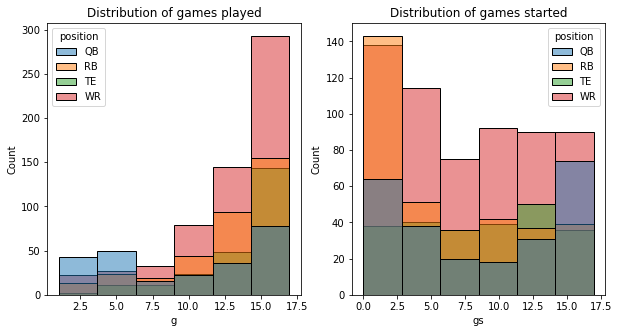

In [86]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')


In [87]:
ff_collective['position'].value_counts()

WR    1038
RB     581
TE     458
QB     372
Name: position, dtype: int64

In [88]:
ff_collective[['g', 'gs']].quantile([.1, .2, .25])

g   gs
0.10   5.0  1.0
0.20   9.0  2.0
0.25  10.0  2.0

It would makes sense to have a games played cutoff for all positons (20th percentile is 5 games played; is a good cut off to keep the top 80% of the league). many of the RBs, WRs and TEs play in a lot of games but don't start them -- the nature of the sport and the amount of players at each position.

Only for QBs should there be a cutoff for games started. 

Other ways to clean up data? 

In [89]:
### if players didn't record any FF stats, some of these columns would be null
# let's check

ff_collective[['tm', 'g', 'gs']].isna().sum()

tm      28
g     1019
gs    1019
dtype: int64

In [90]:
# see a sample of data with nulls

ff_collective[ff_collective[['tm', 'g', 'gs']].isnull().any(axis = 1)].sample(10)

team     player_name position player_id_x  height  weight  years_exp  \
2287  NaN    Deebo Samuel       WR         NaN     NaN     NaN        NaN   
1575  NaN   Isaiah Bowser       RB         NaN     NaN     NaN        NaN   
2256  NaN  Anthony Miller       WR         NaN     NaN     NaN        NaN   
1592  NaN   Dezmon Patmon       WR         NaN     NaN     NaN        NaN   
1567  NaN    Taiwan Jones       RB         NaN     NaN     NaN        NaN   
2168  NaN  Collin Johnson       WR         NaN     NaN     NaN        NaN   
1579  NaN   Nick Guggemos       TE         NaN     NaN     NaN        NaN   
2332  NaN   Chase Edmonds       RB         NaN     NaN     NaN        NaN   
2297  NaN       Drew Lock       QB         NaN     NaN     NaN        NaN   
2337  NaN     Sean Tucker       RB         NaN     NaN     NaN        NaN   

       tm  pos  age   g  gs  tgt  rec  passingyds  passingtd  passingatt  \
2287   SF  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1575  BUF  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2256  PIT  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1592  BUF  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1567  BUF  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2168  NYG  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
1579  BUF  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2332   TB  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2297  SEA  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   
2337   TB  NaN  NaN NaN NaN  NaN  NaN         NaN        NaN         NaN   

      rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
2287         NaN        NaN         NaN           NaN          NaN   
1575         NaN        NaN         NaN           NaN          NaN   
2256         NaN        NaN         NaN           NaN          NaN   
1592         NaN        NaN         NaN           NaN          NaN   
1567         NaN        NaN         NaN           NaN          NaN   
2168         NaN        NaN         NaN           NaN          NaN   
1579         NaN        NaN         NaN           NaN          NaN   
2332         NaN        NaN         NaN           NaN          NaN   
2297         NaN        NaN         NaN           NaN          NaN   
2337         NaN        NaN         NaN           NaN          NaN   

      fantasypoints  int  fumbles  fumbleslost  adp name  season_x  \
2287            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1575            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2256            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1592            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1567            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2168            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
1579            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2332            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2297            NaN  NaN      NaN          NaN  NaN  NaN       NaN   
2337            NaN  NaN      NaN          NaN  NaN  NaN       NaN   

     full_name_x  season_y club_code  depth_team depth_lvl gsis_id_x  \
2287         NaN       NaN       NaN         NaN       NaN       NaN   
1575         NaN       NaN       NaN         NaN       NaN       NaN   
2256         NaN       NaN       NaN         NaN       NaN       NaN   
1592         NaN       NaN       NaN         NaN       NaN       NaN   
1567         NaN       NaN       NaN         NaN       NaN       NaN   
2168         NaN       NaN       NaN         NaN       NaN       NaN   
1579         NaN       NaN       NaN         NaN       NaN       NaN   
2332         NaN       NaN       NaN         NaN       NaN       NaN   
2297         NaN       NaN       NaN         NaN       NaN       NaN   
2337         NaN       NaN       NaN         NaN       NaN

We will get rid of nulls here, as well

In [91]:
## checking fantasy data

ff_collective[['player_name', 'fantasypoints', 'season']].sample(5)

player_name  fantasypoints  season
897   James O'Shaughnessy           26.0  2021.0
813      D'Ernest Johnson           85.0  2021.0
1432         Chris Godwin          119.0  2022.0
995          Daniel Jones          167.0  2021.0
1250           Nick Foles            2.0  2022.0

Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

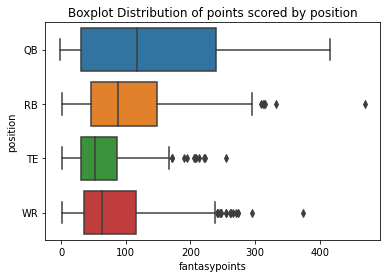

In [92]:
# let's visualize some data within this

ax = sns.boxplot(data = ff_collective, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

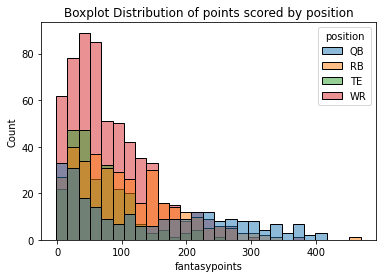

In [93]:
# let's visualize some data within this

ax = sns.histplot(data = ff_collective, x = 'fantasypoints', hue = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

So, the bottom 10% of the league scores 2 or less points a season. The median is 34.6. let's see how this looks after filtering out for games played and other nulls 

The median here has increased, as predicted. We'll use this median as the cutoff for fantasy points in a season in this dataset (46 points).

Thus far, we've excluded players that didn't have any fantasy stats ('g', 'gs', 'tm' all null), players with >= 5 games played (20th percentile), and >= median of fantasy points for all players, as we want relevant players.

At this point, other cutoffs should be made at a position by position basis. 

### Further cleaning and feature engineering

what columns can we simply get rid of (Redundant info, but one has nulls, or one with nulls that we will derive later on, like avg_rush_yards or yards per target)

rush_yards, rush_attempts, avg_rush_yards, rush_touchdowns, targets, receptions, yards, rec_touchdowns, y/a, y/r, completions, completion_percentage, 2pm, 2pp, posrank, totaltds_22

In [94]:
# cols to drop

cols_drop = ['rush_yards', 'rush_attempts', 'avg_rush_yards', 
             'rush_touchdowns', 'targets', 'receptions', 'yards', 
             'rec_touchdowns', 'y/a', 'y/r', 'completions', 'completion_percentage',
            '2pm', '2pp', 'posrank', 'totaltds_22']

ff_collective_sm = ff_collective.drop(cols_drop, axis = 1)

In [95]:
ff_collective_sm[['team']]

team                   team
0     ARI      Arizona Cardinals
1     ARI      Arizona Cardinals
2     ARI      Arizona Cardinals
3     ARI      Arizona Cardinals
4     ARI      Arizona Cardinals
...   ...                    ...
2445  NaN  Washington Commanders
2446  NaN  Washington Commanders
2447  NaN  Washington Commanders
2448  NaN  Washington Commanders
2449  NaN  Washington Commanders

[2450 rows x 2 columns]

In [96]:
ff_collective_sm.tm.value_counts()

NYJ    86
IND    84
HOU    83
NYG    82
DET    80
BAL    79
MIA    79
DEN    79
WAS    78
DAL    77
ATL    76
ARI    75
PIT    75
TEN    75
CAR    73
BUF    73
CLE    73
LAC    72
CIN    71
JAX    70
PHI    70
SEA    68
MIN    67
CHI    67
2TM    51
TAM    49
NOR    46
KAN    45
SFO    45
LAR    42
NWE    40
NO     36
GNB    35
KC     32
GB     31
SF     30
TB     30
LV     30
LVR    29
NE     27
OAK    10
3TM     2
Name: tm, dtype: int64

In [97]:
# need to change some values to others

ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'KC', 'KAN', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'SF', 'SFO', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'NO', 'NOR', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'LV', 'LVR', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'GB', 'GNB', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'TB', 'TAM', ff_collective_sm['tm'])
ff_collective_sm['tm'] = np.where(ff_collective_sm['tm'] == 'NE', 'NWE', ff_collective_sm['tm'])

In [98]:
# 2022 teams have limited data for team wins. need to add that

wins_22 = {'ARI': 4, 'ATL': 7, 'BAL': 10, 'BUF': 13, 'CAR': 7, 'CHI': 3, 'CIN': 12, 'CLE': 7,
           'DAL': 12, 'DEN': 5, 'DET': 9, 'GNB': 8, 'HOU': 3, 'IND': 4, 'JAX': 9, 'LVR': 6,
           'LAC': 10, 'LAR': 5, 'MIA': 9, 'MIN': 13, 'NWE': 8, 'NOR': 7, 'NYG': 9, 'NYJ': 7,
           'PHI': 14, 'PIT': 9, 'SFO': 13, 'SEA': 9, 'TAM': 8, 'TEN': 7, 'WAS': 8}

ff_collective_sm.loc[ff_collective_sm['season'] == 2022, 'team_wins'] = ff_collective_sm['tm'].map(wins_22)

In [99]:
ff_collective_sm.loc[ff_collective_sm['season'] == 2022]['team_wins']

1106    4.0
1107    4.0
1108    4.0
1109    4.0
1110    4.0
       ... 
1454    8.0
1455    8.0
1456    8.0
1457    8.0
1458    8.0
Name: team_wins, Length: 353, dtype: float64

In [100]:
ff_collective_sm.head()

team    player_name position player_id_x  height  weight  years_exp   tm  \
0  ARI   Kyler Murray       QB  00-0035228    70.0   207.0        0.0  ARI   
1  ARI  David Johnson       RB  00-0032187    73.0   224.0        4.0  ARI   
2  ARI   Kenyan Drake       RB  00-0033118    73.0   211.0        3.0  2TM   
3  ARI  Chase Edmonds       RB  00-0034681    69.0   210.0        1.0  ARI   
4  ARI     Dan Arnold       TE  00-0034011    78.0   220.0        2.0  2TM   

  pos   age     g    gs   tgt   rec  passingyds  passingtd  passingatt  \
0  QB  22.0  16.0  16.0   0.0   0.0      3722.0       20.0       542.0   
1  RB  28.0  13.0   9.0  47.0  36.0         0.0        0.0         0.0   
2  RB  25.0  14.0  10.0  68.0  50.0         0.0        0.0         0.0   
3  RB  23.0  13.0   2.0  21.0  12.0         0.0        0.0         0.0   
4  TE  24.0   5.0   1.0  14.0   8.0         0.0        0.0         0.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0       544.0        4.0        93.0           0.0          0.0   
1       345.0        2.0        94.0         370.0          4.0   
2       817.0        8.0       170.0         345.0          0.0   
3       303.0        4.0        60.0         105.0          1.0   
4         0.0        0.0         0.0         127.0          2.0   

   fantasypoints   int  fumbles  fumbleslost    adp           name  season_x  \
0         279.28  12.0      5.0          2.0  114.0   Kyler Murray    2019.0   
1         141.50   0.0      1.0          1.0    5.0  David Johnson    2019.0   
2         212.20   0.0      2.0          1.0   89.0   Kenyan Drake    2019.0   
3          82.80   0.0      0.0          0.0    NaN            NaN    2019.0   
4          32.70   0.0      0.0          0.0    NaN            NaN    2019.0   

     full_name_x  season_y club_code  depth_team depth_lvl   gsis_id_x  \
0   Kyler Murray    2019.0       ARI         1.0   starter  00-0035228   
1  David Johnson    2019.0       ARI         1.0   starter  00-0032187   
2   Kenyan Drake    2019.0       MIA         1.0   starter  00-0033118   
3  Chase Edmonds    2019.0       ARI         2.0  2nd team  00-0034681   
4            NaN       NaN       NaN         NaN       NaN         NaN   

  depth_position  cmp  ppr  dkpt  fdpt  vbd  season player_display_name  \
0             QB  NaN  NaN   NaN   NaN  NaN  2019.0        Kyler Murray   
1             RB  NaN  NaN   NaN   NaN  NaN  2019.0       David Johnson   
2             RB  NaN  NaN   NaN   NaN  NaN  2019.0        Kenyan Drake   
3             RB  NaN  NaN   NaN   NaN  NaN  2019.0       Chase Edmonds   
4            NaN  NaN  NaN   NaN   NaN  NaN  2019.0          Dan Arnold   

  player_gsis_id_x  avg_time_to_throw  avg_completed_air_yards  \
0       00-0035228           2.733681                 4.914236   
1              NaN                NaN                      NaN   
2              NaN                NaN                      NaN   
3              NaN                NaN                      NaN   
4              NaN                NaN                      NaN   

   avg_intended_air_yards  avg_air_yards_differential  aggressiveness  \
0                6.850385                   -1.936149       13.732432   
1                     NaN                         NaN             NaN   
2                     NaN                         NaN             NaN   
3                     NaN                         NaN             NaN   
4               14.411667                         NaN             NaN   

   max_completed_air_distance  avg_air_yards_to_sticks   attempts  pass_yards  \
0                    38.64734                -2.111357  63.764706  437.882353   
1                         NaN                      NaN        NaN         NaN   
2                         NaN                      NaN        NaN         NaN   
3                         NaN                      NaN        NaN         NaN   
4                         NaN                      NaN        NaN  

In [101]:
# running similar code as above to create new columns

# percentage of games started
ff_collective_sm['pct_gs'] = ff_collective_sm['gs'] / ff_collective_sm['g'] 

ff_collective_sm['avg_per_rush'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushingatt']

ff_collective_sm['avg_per_catch'] = ff_collective_sm['receivingyds'] / ff_collective_sm['rec']

ff_collective_sm['avg_per_tgt'] = ff_collective_sm['receivingyds'] / ff_collective_sm['tgt']

ff_collective_sm['ttl_touch'] = ff_collective_sm['rushingatt'] + ff_collective_sm['rec']

ff_collective_sm['ttl_opp'] = ff_collective_sm['rushingatt'] + ff_collective_sm['tgt'] + ff_collective_sm['passingatt']

ff_collective_sm['ttl_turnover'] = ff_collective_sm['int'] + ff_collective_sm['fumbleslost']

ff_collective_sm['ttl_opp_per_game'] = ff_collective_sm['ttl_opp'] / ff_collective_sm['g']

ff_collective_sm['yds_per_opp'] = (ff_collective_sm['receivingyds'] + ff_collective_sm['rushingyds'] + ff_collective_sm['passingyds']) / ff_collective_sm['ttl_opp']

ff_collective_sm['td_per_opp'] = (ff_collective_sm['receivingtd'] + ff_collective_sm['rushingtd'] + ff_collective_sm['passingtd']) / ff_collective_sm['ttl_opp']

ff_collective_sm['turnover_per_opp'] = ff_collective_sm['ttl_turnover'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_opp'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_gm'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['g']

# yards and tds
ff_collective_sm['scrimyds'] = ff_collective_sm['rushingyds'] + ff_collective_sm['receivingyds']
ff_collective_sm['tot_prr_yds'] = ff_collective_sm['rushingyds'] + ff_collective_sm['receivingyds'] + ff_collective_sm['passingyds']
ff_collective_sm['non_pass_tds'] = ff_collective_sm['rushingtd']  + ff_collective_sm['receivingtd']

## percentage of team yards
# rushing yards
ff_collective_sm['pct_team_rush_yards'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushy']
# receiving/passing yards
ff_collective_sm['pct_team_rec_yards'] = ff_collective_sm['receivingyds'] / ff_collective_sm['passy']
# passing yards
ff_collective_sm['pct_team_pass_yards'] = ff_collective_sm['passingyds'] / ff_collective_sm['passy']

# scrim yards
ff_collective_sm['pct_team_scrim_yards'] = ff_collective_sm['scrimyds'] / ff_collective_sm['totyd']

# all yards
ff_collective_sm['pct_team_yards_qb'] = ff_collective_sm['tot_prr_yds'] / ff_collective_sm['totyd']

# If rookie year
ff_collective_sm['rookie'] = np.where(ff_collective_sm['years_exp'] == 0, 1, 0)



# getting standard fantasy points
ff_collective_sm['std_fp'] = ff_collective_sm['passingyds'] * 0.04 + ff_collective_sm['scrimyds'] * 0.1 + \
                          ff_collective_sm['passingtd'] * 4 + ff_collective_sm['non_pass_tds'] * 6 + \
                          (ff_collective_sm['ttl_turnover'] * -2)

# creating another with 5 pt passing tds
ff_collective_sm['std_fp_5ptd'] = ff_collective_sm['std_fp'] + ff_collective_sm['passingtd']


ff_collective_sm['hppr_fp'] = ff_collective_sm['std_fp'] + (0.5 * ff_collective_sm['rec'])
ff_collective_sm['hppr_fp_5ptd'] = ff_collective_sm['std_fp_5ptd'] + (0.5 * ff_collective_sm['rec'])

# writing short function for te_premium points
def te_prem(row):
    if row['position'] == 'TE':
        return row['std_fp'] + (1 * row['rec'])
    else:
        return row['std_fp'] + (0.5 * row['rec'])
                                
ff_collective_sm['te_prem_pts'] = ff_collective_sm.apply(lambda row: te_prem(row), axis=1)
ff_collective_sm['te_prem_pts_p5td'] = ff_collective_sm['te_prem_pts']  + ff_collective_sm['passingtd']

ff_collective_sm['hppr_pts_pg_5ptd'] = ff_collective_sm['hppr_fp_5ptd'] / ff_collective_sm['g']

ff_collective_sm['te_prem_pts_pg_5ptd'] = ff_collective_sm['te_prem_pts_p5td'] / ff_collective_sm['g']

ff_collective_sm.sample(5)

team     player_name position player_id_x  height  weight  years_exp  \
746   ATL      Kyle Pitts       TE  00-0036970    78.0   250.0        0.0   
3     ARI   Chase Edmonds       RB  00-0034681    69.0   210.0        1.0   
2068  NaN  Brandon Powell       WR         NaN     NaN     NaN        NaN   
2010  NaN    Jalen Guyton       WR         NaN     NaN     NaN        NaN   
48    CAR  Donte Moncrief       WR  00-0031339    74.0   215.0        5.0   

       tm  pos   age     g    gs    tgt   rec  passingyds  passingtd  \
746   ATL   TE  21.0  17.0  15.0  110.0  68.0         0.0        0.0   
3     ARI   RB  23.0  13.0   2.0   21.0  12.0         0.0        0.0   
2068  MIN  NaN   NaN   NaN   NaN    NaN   NaN         NaN        NaN   
2010  LAC  NaN   NaN   NaN   NaN    NaN   NaN         NaN        NaN   
48    2TM   WR  26.0   8.0   2.0   15.0   4.0         0.0        0.0   

      passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
746          0.0         0.0        0.0         0.0        1026.0   
3            0.0       303.0        4.0        60.0         105.0   
2068         NaN         NaN        NaN         NaN           NaN   
2010         NaN         NaN        NaN         NaN           NaN   
48           0.0         0.0        0.0         0.0          18.0   

      receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
746           1.0          109.0  0.0      0.0          0.0   45.0   
3             1.0           82.8  0.0      0.0          0.0    NaN   
2068          NaN            NaN  NaN      NaN          NaN    NaN   
2010          NaN            NaN  NaN      NaN          NaN    NaN   
48            0.0            5.8  0.0      0.0          0.0  121.0   

                name  season_x     full_name_x  season_y club_code  \
746       Kyle Pitts    2021.0      Kyle Pitts    2021.0       ATL   
3                NaN    2019.0   Chase Edmonds    2019.0       ARI   
2068             NaN       NaN             NaN       NaN       NaN   
2010             NaN       NaN             NaN       NaN       NaN   
48    Donte Moncrief    2019.0  Donte Moncrief    2019.0       PIT   

      depth_team depth_lvl   gsis_id_x depth_position  cmp  ppr  dkpt  fdpt  \
746          1.0   starter  00-0036970             TE  NaN  NaN   NaN   NaN   
3            2.0  2nd team  00-0034681             RB  NaN  NaN   NaN   NaN   
2068         NaN       NaN         NaN            NaN  NaN  NaN   NaN   NaN   
2010         NaN       NaN         NaN            NaN  NaN  NaN   NaN   NaN   
48           1.0   starter  00-0031339             WR  NaN  NaN   NaN   NaN   

      vbd  season player_display_name player_gsis_id_x  avg_time_to_throw  \
746   NaN  2021.0          Kyle Pitts              NaN                NaN   
3     NaN  2019.0       Chase Edmonds              NaN                NaN   
2068  NaN  2023.0                 NaN              NaN                NaN   
2010  NaN  2023.0                 NaN              NaN                NaN   
48    NaN  2019.0      Donte Moncrief              NaN                NaN   

      avg_completed_air_yards  avg_intended_air_yards  \
746                       NaN               10.416043   
3                         NaN                     NaN   
2068                      NaN                     NaN   
2010                      NaN                     NaN   
48                        NaN                9.999000   

      avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
746                          NaN             NaN                         NaN   
3                            NaN             NaN                         NaN   
2068                         NaN             NaN                         NaN   
2010                         NaN             NaN                         NaN   
48                           NaN             NaN                         NaN   

      avg_air_yards_to_sticks  attempts  pass_yards  pass_touchdowns  \
746               

In [102]:
# fantasypoints are ppr points with standard qb scoring (4 pts per td pass)

ff_collective_sm[['position', 'rec', 'passingtd', 'fantasypoints', 'std_fp', 'hppr_fp', 'te_prem_pts']].sample(5)

position   rec  passingtd  fantasypoints  std_fp  hppr_fp  te_prem_pts
2217       TE   NaN        NaN            NaN     NaN      NaN          NaN
588        WR  28.0        0.0           26.0   25.58    39.58        39.58
2073       WR   NaN        NaN            NaN     NaN      NaN          NaN
898        TE   9.0        0.0           12.0   11.50    16.00        20.50
1966       RB   NaN        NaN            NaN     NaN      NaN          NaN

# Cleaning ff_collective!

From iterations through these notebooks, there continues to be some data quality issues. Really, due to the nature of the data, there will be nulls from when players either retire or come into the league, or get injured too. 


In [103]:
ff_collective_sm.describe()

height       weight    years_exp          age            g  \
count  1459.000000  1459.000000  1459.000000  1431.000000  1431.000000   
mean     73.252913   215.919808     3.769705    26.245283    12.573026   
std       2.831054    21.692603     3.417319     3.571733     4.331388   
min      66.000000   153.000000     0.000000    21.000000     1.000000   
25%      71.000000   200.000000     1.000000    24.000000    10.000000   
50%      73.000000   215.000000     3.000000    26.000000    14.000000   
75%      76.000000   227.000000     5.000000    28.000000    16.000000   
max      80.000000   270.000000    22.000000    45.000000    17.000000   

                gs          tgt          rec   passingyds    passingtd  \
count  1431.000000  1431.000000  1431.000000  1431.000000  1431.000000   
mean      7.619846    43.347310    29.064990   358.909853     2.259958   
std       5.590151    39.904172    27.034877  1027.265278     6.945507   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    10.500000     7.000000     0.000000     0.000000   
50%       7.000000    35.000000    24.000000     0.000000     0.000000   
75%      13.000000    65.000000    43.500000     0.000000     0.000000   
max      17.000000   191.000000   149.000000  5316.000000    48.000000   

        passingatt   rushingyds    rushingtd   rushingatt  receivingyds  \
count  1431.000000  1431.000000  1431.000000  1431.000000   1431.000000   
mean     50.107617   158.740042     1.276031    35.974843    326.491964   
std     140.836679   294.685414     2.627180    64.638105    339.512810   
min       0.000000   -15.000000     0.000000     0.000000    -10.000000   
25%       0.000000     0.000000     0.000000     0.000000     55.500000   
50%       0.000000    13.000000     0.000000     3.000000    224.000000   
75%       0.000000   160.500000     1.000000    41.000000    477.000000   
max     733.000000  2027.000000    18.000000   378.000000   1947.000000   

       receivingtd  fantasypoints          int      fumbles  fumbleslost  \
count  1431.000000    1431.000000  1431.000000  1431.000000  1431.000000   
mean      2.021663      95.596618     1.134172     1.457722     0.685535   
std       2.588075      80.807263     3.208625     2.400057     1.181587   
min       0.000000      -1.460000     0.000000     0.000000     0.000000   
25%       0.000000      35.000000     0.000000     0.000000     0.000000   
50%       1.000000      72.000000     0.000000     1.000000     0.000000   
75%       3.000000     136.000000     0.000000     2.000000     1.000000   
max      18.000000     469.200000    30.000000    18.000000    11.000000   

              adp     season_x     season_y   depth_team         cmp  \
count  596.000000  1459.000000  1282.000000  1282.000000  346.000000   
mean    84.137584  2020.496916  2020.484399     1.608424   33.028902   
std     54.219980     1.105770     1.112061     0.722899   90.784499   
min      1.000000  2019.000000  2019.000000     1.000000    0.000000   
25%     39.000000  2020.000000  2020.000000     1.000000    0.000000   
50%     79.000000  2020.000000  2020.000000     1.000000    0.000000   
75%    121.000000  2021.000000  2021.000000     2.000000    0.000000   
max    222.000000  2022.000000  2022.000000     3.000000  490.000000   

              ppr        dkpt        fdpt         vbd       season  \
count  346.000000  346.000000  346.000000   69.000000  2449.000000   
mean   117.508671  122.800578  104.007225   46.231884  2021.508779   
std     87.853855   90.197522   82.261918   39.412280     1.495918   
min      1.800000    2.700000    2.200000    1.000000  2019.000000   
25%     46.775000   51.525000   42.025000   14.000000  2020.000000   
50%     97.500000  100.500000   81.550000   35.000000  2022.000000   
75%    168.550000  176.375000  145.000000   69.000000  2023.000000   
max    417.400000  435.400000  428.900000  136.000000  2023.000000   

       avg_time_to_throw  avg_complet

In [104]:
ff_collective_sm.isna().sum()

team                    991
player_name               1
position                  1
player_id_x             991
height                  991
                       ... 
hppr_fp_5ptd           1019
te_prem_pts            1019
te_prem_pts_p5td       1019
hppr_pts_pg_5ptd       1019
te_prem_pts_pg_5ptd    1019
Length: 150, dtype: int64

In [105]:
scoring_by_year = ['te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020', 'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

null_cols = ['te_prem_pts_p5td','tm', 'pos','pts_scored', 'age', 'passy_last_yr_tm_stat']

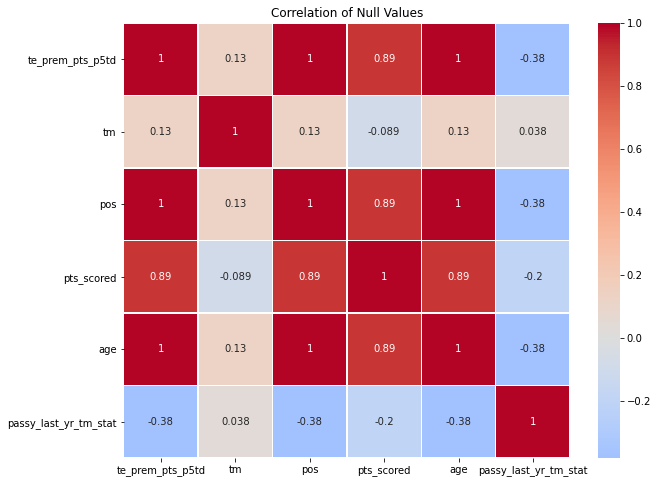

In [106]:
# let's see if there are any large correlations between nulls

null_corr = ff_collective_sm[null_cols].isna().corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(null_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation of Null Values")
plt.show()


In [107]:
# based on the data, people who have team be null (and many subsequent rows) 
# from fantasy data definitely are not relevants 

ff_collective_sm.dropna(subset = ['tm'])

team       player_name position player_id_x  height  weight  years_exp  \
0     ARI      Kyler Murray       QB  00-0035228    70.0   207.0        0.0   
1     ARI     David Johnson       RB  00-0032187    73.0   224.0        4.0   
2     ARI      Kenyan Drake       RB  00-0033118    73.0   211.0        3.0   
3     ARI     Chase Edmonds       RB  00-0034681    69.0   210.0        1.0   
4     ARI        Dan Arnold       TE  00-0034011    78.0   220.0        2.0   
...   ...               ...      ...         ...     ...     ...        ...   
2445  NaN     Kazmeir Allen       WR         NaN     NaN     NaN        NaN   
2446  NaN       Zion Bowens       WR         NaN     NaN     NaN        NaN   
2447  NaN      Jalen Sample       WR         NaN     NaN     NaN        NaN   
2448  NaN  Mitchell Tinsley       WR         NaN     NaN     NaN        NaN   
2449  NaN   Brycen Tremayne       WR         NaN     NaN     NaN        NaN   

       tm  pos   age     g    gs   tgt   rec  passingyds  passingtd  \
0     ARI   QB  22.0  16.0  16.0   0.0   0.0      3722.0       20.0   
1     ARI   RB  28.0  13.0   9.0  47.0  36.0         0.0        0.0   
2     2TM   RB  25.0  14.0  10.0  68.0  50.0         0.0        0.0   
3     ARI   RB  23.0  13.0   2.0  21.0  12.0         0.0        0.0   
4     2TM   TE  24.0   5.0   1.0  14.0   8.0         0.0        0.0   
...   ...  ...   ...   ...   ...   ...   ...         ...        ...   
2445  WAS  NaN   NaN   NaN   NaN   NaN   NaN         NaN        NaN   
2446  WAS  NaN   NaN   NaN   NaN   NaN   NaN         NaN        NaN   
2447  WAS  NaN   NaN   NaN   NaN   NaN   NaN         NaN        NaN   
2448  WAS  NaN   NaN   NaN   NaN   NaN   NaN         NaN        NaN   
2449  WAS  NaN   NaN   NaN   NaN   NaN   NaN         NaN        NaN   

      passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
0          542.0       544.0        4.0        93.0           0.0   
1            0.0       345.0        2.0        94.0         370.0   
2            0.0       817.0        8.0       170.0         345.0   
3            0.0       303.0        4.0        60.0         105.0   
4            0.0         0.0        0.0         0.0         127.0   
...          ...         ...        ...         ...           ...   
2445         NaN         NaN        NaN         NaN           NaN   
2446         NaN         NaN        NaN         NaN           NaN   
2447         NaN         NaN        NaN         NaN           NaN   
2448         NaN         NaN        NaN         NaN           NaN   
2449         NaN         NaN        NaN         NaN           NaN   

      receivingtd  fantasypoints   int  fumbles  fumbleslost    adp  \
0             0.0         279.28  12.0      5.0          2.0  114.0   
1             4.0         141.50   0.0      1.0          1.0    5.0   
2             0.0         212.20   0.0      2.0          1.0   89.0   
3             1.0          82.80   0.0      0.0          0.0    NaN   
4             2.0          32.70   0.0      0.0          0.0    NaN   
...           ...            ...   ...      ...          ...    ...   
2445          NaN            NaN   NaN      NaN          NaN    NaN   
2446          NaN            NaN   NaN      NaN          NaN    NaN   
2447          NaN            NaN   NaN      NaN          NaN    NaN   
2448          NaN            NaN   NaN      NaN          NaN    NaN   
2449          NaN            NaN   NaN      NaN          NaN    NaN   

               name  season_x    full_name_x  season_y club_code  depth_team  \
0      Kyler Murray    2019.0   Kyler Murray    2019.0       ARI         1.0   
1     David Johnson    2019.0  David Johnson    2019.0       ARI         1.0   
2      Kenyan Drake    2019.0   Kenyan Drake    2019.0       MIA         1.0   
3               NaN    2019.0  Chase Edmonds    2019.0       ARI         2.0   
4               NaN    2019.0            NaN       NaN       NaN         NaN   
...             ...       ...            

In [108]:
ff_collective_sm.isna().sum()

team                    991
player_name               1
position                  1
player_id_x             991
height                  991
                       ... 
hppr_fp_5ptd           1019
te_prem_pts            1019
te_prem_pts_p5td       1019
hppr_pts_pg_5ptd       1019
te_prem_pts_pg_5ptd    1019
Length: 150, dtype: int64

In [109]:
# there are way less nulls now!
# let's check describe again

ff_collective_sm.describe()

height       weight    years_exp          age            g  \
count  1459.000000  1459.000000  1459.000000  1431.000000  1431.000000   
mean     73.252913   215.919808     3.769705    26.245283    12.573026   
std       2.831054    21.692603     3.417319     3.571733     4.331388   
min      66.000000   153.000000     0.000000    21.000000     1.000000   
25%      71.000000   200.000000     1.000000    24.000000    10.000000   
50%      73.000000   215.000000     3.000000    26.000000    14.000000   
75%      76.000000   227.000000     5.000000    28.000000    16.000000   
max      80.000000   270.000000    22.000000    45.000000    17.000000   

                gs          tgt          rec   passingyds    passingtd  \
count  1431.000000  1431.000000  1431.000000  1431.000000  1431.000000   
mean      7.619846    43.347310    29.064990   358.909853     2.259958   
std       5.590151    39.904172    27.034877  1027.265278     6.945507   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    10.500000     7.000000     0.000000     0.000000   
50%       7.000000    35.000000    24.000000     0.000000     0.000000   
75%      13.000000    65.000000    43.500000     0.000000     0.000000   
max      17.000000   191.000000   149.000000  5316.000000    48.000000   

        passingatt   rushingyds    rushingtd   rushingatt  receivingyds  \
count  1431.000000  1431.000000  1431.000000  1431.000000   1431.000000   
mean     50.107617   158.740042     1.276031    35.974843    326.491964   
std     140.836679   294.685414     2.627180    64.638105    339.512810   
min       0.000000   -15.000000     0.000000     0.000000    -10.000000   
25%       0.000000     0.000000     0.000000     0.000000     55.500000   
50%       0.000000    13.000000     0.000000     3.000000    224.000000   
75%       0.000000   160.500000     1.000000    41.000000    477.000000   
max     733.000000  2027.000000    18.000000   378.000000   1947.000000   

       receivingtd  fantasypoints          int      fumbles  fumbleslost  \
count  1431.000000    1431.000000  1431.000000  1431.000000  1431.000000   
mean      2.021663      95.596618     1.134172     1.457722     0.685535   
std       2.588075      80.807263     3.208625     2.400057     1.181587   
min       0.000000      -1.460000     0.000000     0.000000     0.000000   
25%       0.000000      35.000000     0.000000     0.000000     0.000000   
50%       1.000000      72.000000     0.000000     1.000000     0.000000   
75%       3.000000     136.000000     0.000000     2.000000     1.000000   
max      18.000000     469.200000    30.000000    18.000000    11.000000   

              adp     season_x     season_y   depth_team         cmp  \
count  596.000000  1459.000000  1282.000000  1282.000000  346.000000   
mean    84.137584  2020.496916  2020.484399     1.608424   33.028902   
std     54.219980     1.105770     1.112061     0.722899   90.784499   
min      1.000000  2019.000000  2019.000000     1.000000    0.000000   
25%     39.000000  2020.000000  2020.000000     1.000000    0.000000   
50%     79.000000  2020.000000  2020.000000     1.000000    0.000000   
75%    121.000000  2021.000000  2021.000000     2.000000    0.000000   
max    222.000000  2022.000000  2022.000000     3.000000  490.000000   

              ppr        dkpt        fdpt         vbd       season  \
count  346.000000  346.000000  346.000000   69.000000  2449.000000   
mean   117.508671  122.800578  104.007225   46.231884  2021.508779   
std     87.853855   90.197522   82.261918   39.412280     1.495918   
min      1.800000    2.700000    2.200000    1.000000  2019.000000   
25%     46.775000   51.525000   42.025000   14.000000  2020.000000   
50%     97.500000  100.500000   81.550000   35.000000  2022.000000   
75%    168.550000  176.375000  145.000000   69.000000  2023.000000   
max    417.400000  435.400000  428.900000  136.000000  2023.000000   

       avg_time_to_throw  avg_complet

Nothing seems out of the ordinary here. More nulls will likely decrease as we work with position specific data

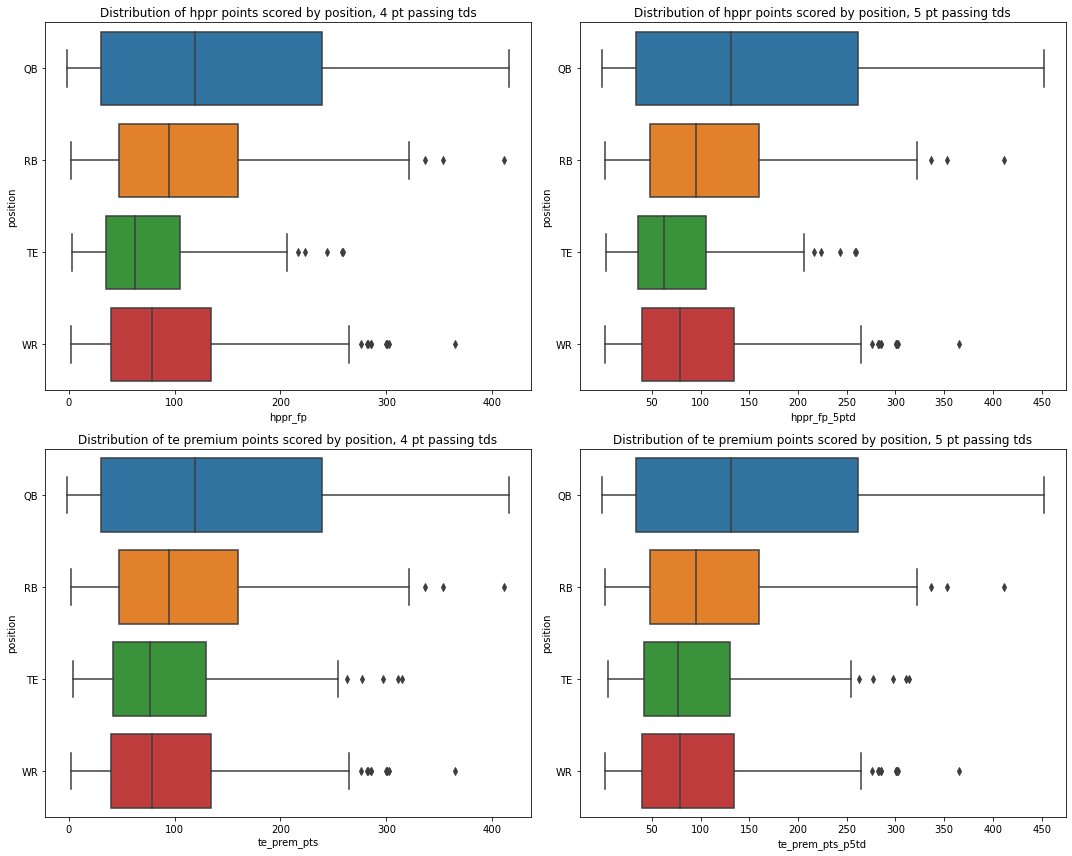

In [110]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Distribution of te premium points per game scored by position, 5 pt passing tds')

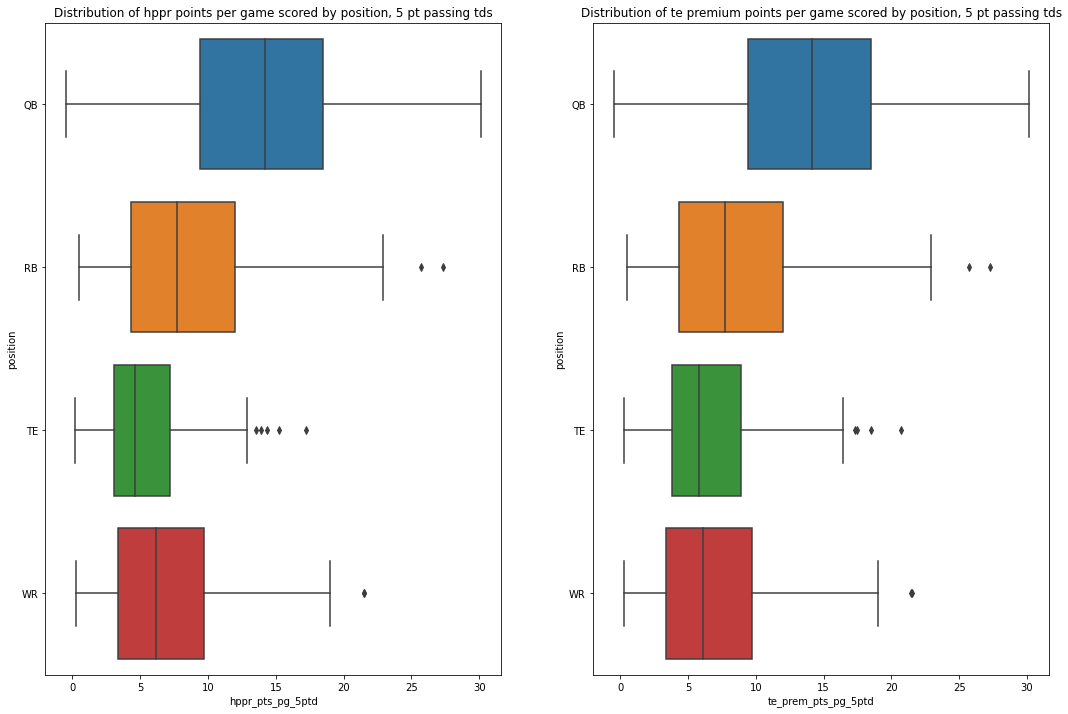

In [111]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_pts_pg_5ptd', ax = axes[0], y = 'position')
axes[0].set_title('Distribution of hppr points per game scored by position, 5 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_pg_5ptd', ax = axes[1], y = 'position')
axes[1].set_title('Distribution of te premium points per game scored by position, 5 pt passing tds')


Text(0.5, 1.0, 'Distribution of games started')

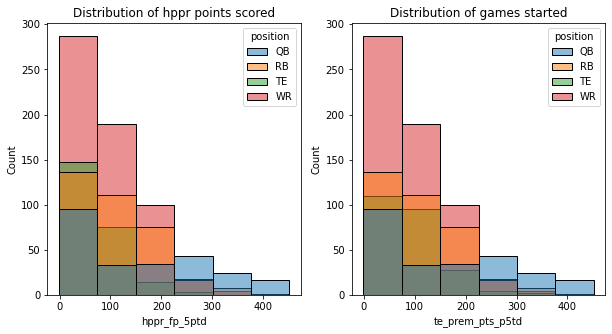

In [112]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of hppr points scored')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

### ranking each in the season
Can we take the top 12 - 36 at each position?

In [113]:
# first, we'll sort these by position, season, and pts scored

ff_sorted = ff_collective_sm.sort_values(['position', 'season', 'hppr_fp_5ptd'], ascending = [True, True, False])

ff_sorted.head()

team     player_name position player_id_x  height  weight  years_exp   tm  \
21   BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
78   DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
299  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
125  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
322   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

    pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
21   QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
78   QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
299  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
125  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
322  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

     rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
21       1206.0        7.0       176.0           0.0          0.0   
78        277.0        3.0        52.0           0.0          0.0   
299       342.0        3.0        75.0           0.0          0.0   
125       413.0        7.0        82.0           6.0          1.0   
322       250.0        1.0        59.0           0.0          0.0   

     fantasypoints   int  fumbles  fumbleslost    adp            name  \
21          415.68   6.0      9.0          2.0   98.0   Lamar Jackson   
78          335.78  11.0      6.0          2.0  131.0    Dak Prescott   
299         326.60   5.0      8.0          2.0   93.0  Russell Wilson   
125         318.98  12.0     10.0          3.0   48.0  Deshaun Watson   
322         297.36  30.0     12.0          5.0  111.0  Jameis Winston   

     season_x     full_name_x  season_y club_code  depth_team depth_lvl  \
21     2019.0   Lamar Jackson    2019.0       BAL         1.0   starter   
78     2019.0    Dak Prescott    2019.0       DAL         1.0   starter   
299    2019.0  Russell Wilson    2019.0       SEA         1.0   starter   
125    2019.0  Deshaun Watson    2019.0       HOU         1.0   starter   
322    2019.0  Jameis Winston    2019.0        TB         1.0   starter   

      gsis_id_x depth_position  cmp  ppr  dkpt  fdpt  vbd  season  \
21   00-0034796             QB  NaN  NaN   NaN   NaN  NaN  2019.0   
78   00-0033077             QB  NaN  NaN   NaN   NaN  NaN  2019.0   
299  00-0029263             QB  NaN  NaN   NaN   NaN  NaN  2019.0   
125  00-0033537             QB  NaN  NaN   NaN   NaN  NaN  2019.0   
322  00-0031503             QB  NaN  NaN   NaN   NaN  NaN  2019.0   

    player_display_name player_gsis_id_x  avg_time_to_throw  \
21        Lamar Jackson       00-0034796           2.943613   
78         Dak Prescott       00-0033077           2.863889   
299      Russell Wilson       00-0029263           2.857214   
125      Deshaun Watson       00-0033537           2.811673   
322      Jameis Winston       00-0031503           2.773831   

     avg_completed_air_yards  avg_intended_air_yards  \
21                  6.721439                8.814669   
78                  7.383088                9.074466   
299                 6.919418                9.558971   
125                 6.598724                8.822830   
322                 8.317304               10.508673   

     avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
21                    -2.093231       14.902159                   38.032465   
78                    -1.691378       17.214539                   41.775767   
299                   -2.639553       19.070277                   43.704954   
125                   -2.224106       15.675721                   43.954208   
322                   -2.191370       17.202558                   43.811773   

     avg_air_yards_to_sticks   attempts  pass_yards  pass_touchdowns  \
21                  0.242468  50.125000  390.875000         4.500000   
78               

In [114]:
# grouping by posiiton and season
# getting rank for these

ff_grouped = ff_sorted.groupby(['position', 'season'])

# adding rank column to collective
ff_collective_sm['season_position_rank'] = ff_grouped['hppr_fp_5ptd'].rank(ascending = False)
ff_sorted['season_position_rank'] = ff_grouped['hppr_fp_5ptd'].rank(ascending = False)

ff_collective_sm.sample(5)

team          player_name position player_id_x  height  weight  \
482    GB        Aaron Rodgers       QB  00-0023459    74.0   225.0   
1390  PHI       Dallas Goedert       TE  00-0034351    77.0   256.0   
828   DAL       Michael Gallup       WR  00-0034764    73.0   200.0   
1776  NaN  Lil'Jordan Humphrey       WR         NaN     NaN     NaN   
224   MIN     Laquon Treadwell       WR  00-0032951    74.0   215.0   

      years_exp   tm  pos   age     g    gs   tgt   rec  passingyds  \
482        15.0  GNB   QB  37.0  16.0  16.0   1.0   1.0      4299.0   
1390        4.0  PHI   TE  27.0  12.0  12.0  69.0  55.0         0.0   
828         3.0  DAL   WR  25.0   9.0   8.0  62.0  35.0         0.0   
1776        NaN  DEN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
224         3.0  MIN   WR  24.0  13.0   1.0  16.0   9.0         0.0   

      passingtd  passingatt  rushingyds  rushingtd  rushingatt  receivingyds  \
482        48.0       526.0       149.0        3.0        38.0          -6.0   
1390        0.0         0.0         0.0        0.0         0.0         702.0   
828         0.0         0.0         0.0        0.0         0.0         445.0   
1776        NaN         NaN         NaN        NaN         NaN           NaN   
224         0.0         0.0         0.0        0.0         0.0         184.0   

      receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
482           0.0          382.0  5.0      4.0          2.0   89.0   
1390          3.0           86.0  0.0      1.0          1.0   78.0   
828           2.0           57.0  0.0      0.0          0.0  146.0   
1776          NaN            NaN  NaN      NaN          NaN    NaN   
224           1.0           33.4  0.0      0.0          0.0    NaN   

                name  season_x     full_name_x  season_y club_code  \
482    Aaron Rodgers    2020.0   Aaron Rodgers    2020.0        GB   
1390  Dallas Goedert    2022.0  Dallas Goedert    2022.0       PHI   
828   Michael Gallup    2021.0  Michael Gallup    2021.0       DAL   
1776             NaN       NaN             NaN       NaN       NaN   
224              NaN    2019.0             NaN       NaN       NaN   

      depth_team depth_lvl   gsis_id_x depth_position  cmp    ppr   dkpt  \
482          1.0   starter  00-0023459             QB  NaN    NaN    NaN   
1390         1.0   starter  00-0034351             TE  0.0  141.2  145.2   
828          1.0   starter  00-0034764             WR  NaN    NaN    NaN   
1776         NaN       NaN         NaN            NaN  NaN    NaN    NaN   
224          NaN       NaN         NaN            NaN  NaN    NaN    NaN   

       fdpt  vbd  season player_display_name player_gsis_id_x  \
482     NaN  NaN  2020.0       Aaron Rodgers       00-0023459   
1390  113.7  1.0  2022.0      Dallas Goedert              NaN   
828     NaN  NaN  2021.0      Michael Gallup              NaN   
1776    NaN  NaN  2023.0                 NaN              NaN   
224     NaN  NaN  2019.0    Laquon Treadwell              NaN   

      avg_time_to_throw  avg_completed_air_yards  avg_intended_air_yards  \
482            2.726101                 5.402501                7.986633   
1390                NaN                      NaN                6.156983   
828                 NaN                      NaN               12.589181   
1776                NaN                      NaN                     NaN   
224                 NaN                      NaN               16.344000   

      avg_air_yards_differential  aggressiveness  max_completed_air_distance  \
482                    -2.584132       10.579508                   45.733018   
1390                         NaN             NaN                         NaN   
828                          NaN             NaN                         NaN   
1776                         NaN             NaN                         NaN   
224                          NaN             NaN                         NaN   

      avg_air_yards_to_sticks   attempts  

In [115]:
# creating a column to display 'level' of fantasy 
# ie qb1, rb1, wr1, etc. would be the top 12 at each position
# qb2 would be next 13-24, etc
def ff_rank_bucket(rank):
    if rank >= 1 and rank <= 12:
        return 1
    elif rank >=13 and rank <= 24:
        return 2
    elif rank >=25 and rank <=36:
        return 3
    else:
        return 'Non-starter'


ff_collective_sm['ff_level'] = ff_collective_sm['season_position_rank'].apply(ff_rank_bucket)
ff_sorted['ff_level'] = ff_sorted['season_position_rank'].apply(ff_rank_bucket)

In [116]:
# we want top 12 QBs, top 24 RBs, top 36 WRs, top 12 TEs

starter_cts = {'QB': 12, 'RB': 24, 'WR': 36, 'TE': 12}

# creating an empty df to store the top rows

starter_df = pd.DataFrame()

# iterating over each category
for pos, ct in starter_cts.items():
    # selecting top rows for each
    top_rows = ff_sorted[ff_sorted['position'] == pos].groupby('season').head(ct)
    
    # appending to starter_df
    starter_df = pd.concat([starter_df, top_rows])
    
# reset index
starter_df = starter_df.reset_index(drop = True)

starter_df.head(5)

team     player_name position player_id_x  height  weight  years_exp   tm  \
0  BAL   Lamar Jackson       QB  00-0034796    74.0   212.0        1.0  BAL   
1  DAL    Dak Prescott       QB  00-0033077    74.0   238.0        3.0  DAL   
2  SEA  Russell Wilson       QB  00-0029263    71.0   215.0        7.0  SEA   
3  HOU  Deshaun Watson       QB  00-0033537    74.0   221.0        2.0  HOU   
4   TB  Jameis Winston       QB  00-0031503    76.0   231.0        4.0  TAM   

  pos   age     g    gs  tgt  rec  passingyds  passingtd  passingatt  \
0  QB  22.0  15.0  15.0  0.0  0.0      3127.0       36.0       401.0   
1  QB  26.0  16.0  16.0  0.0  0.0      4902.0       30.0       596.0   
2  QB  31.0  16.0  16.0  0.0  0.0      4110.0       31.0       516.0   
3  QB  24.0  15.0  15.0  1.0  1.0      3852.0       26.0       495.0   
4  QB  25.0  16.0  16.0  0.0  0.0      5109.0       33.0       626.0   

   rushingyds  rushingtd  rushingatt  receivingyds  receivingtd  \
0      1206.0        7.0       176.0           0.0          0.0   
1       277.0        3.0        52.0           0.0          0.0   
2       342.0        3.0        75.0           0.0          0.0   
3       413.0        7.0        82.0           6.0          1.0   
4       250.0        1.0        59.0           0.0          0.0   

   fantasypoints   int  fumbles  fumbleslost    adp            name  season_x  \
0         415.68   6.0      9.0          2.0   98.0   Lamar Jackson    2019.0   
1         335.78  11.0      6.0          2.0  131.0    Dak Prescott    2019.0   
2         326.60   5.0      8.0          2.0   93.0  Russell Wilson    2019.0   
3         318.98  12.0     10.0          3.0   48.0  Deshaun Watson    2019.0   
4         297.36  30.0     12.0          5.0  111.0  Jameis Winston    2019.0   

      full_name_x  season_y club_code  depth_team depth_lvl   gsis_id_x  \
0   Lamar Jackson    2019.0       BAL         1.0   starter  00-0034796   
1    Dak Prescott    2019.0       DAL         1.0   starter  00-0033077   
2  Russell Wilson    2019.0       SEA         1.0   starter  00-0029263   
3  Deshaun Watson    2019.0       HOU         1.0   starter  00-0033537   
4  Jameis Winston    2019.0        TB         1.0   starter  00-0031503   

  depth_position  cmp  ppr  dkpt  fdpt  vbd  season player_display_name  \
0             QB  NaN  NaN   NaN   NaN  NaN  2019.0       Lamar Jackson   
1             QB  NaN  NaN   NaN   NaN  NaN  2019.0        Dak Prescott   
2             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Russell Wilson   
3             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Deshaun Watson   
4             QB  NaN  NaN   NaN   NaN  NaN  2019.0      Jameis Winston   

  player_gsis_id_x  avg_time_to_throw  avg_completed_air_yards  \
0       00-0034796           2.943613                 6.721439   
1       00-0033077           2.863889                 7.383088   
2       00-0029263           2.857214                 6.919418   
3       00-0033537           2.811673                 6.598724   
4       00-0031503           2.773831                 8.317304   

   avg_intended_air_yards  avg_air_yards_differential  aggressiveness  \
0                8.814669                   -2.093231       14.902159   
1                9.074466                   -1.691378       17.214539   
2                9.558971                   -2.639553       19.070277   
3                8.822830                   -2.224106       15.675721   
4               10.508673                   -2.191370       17.202558   

   max_completed_air_distance  avg_air_yards_to_sticks   attempts  pass_yards  \
0                   38.032465                 0.242468  50.125000  390.875000   
1                   41.775767                 0.210847  70.117647  576.705882   
2                   43.704954                 0.181699  60.470588  481.411765   
3                   43.954208                 0.144872  61.875000  481.500000   
4                   43.811773                 1.330559  73.52

In [117]:
starter_df.shape

(420, 152)

In [118]:
# let's do this again, but take relevant players at each position
## top 40 qbs, top 96 rbs, top 128 wrs, top 64 TEs

relevant_cts = {'QB': 40, 'RB': 96, 'WR': 128, 'TE': 64}

# creating an empty df to store the top rows

relevant_df = pd.DataFrame()

# iterating over each category
for pos, ct in relevant_cts.items():
    # selecting top rows for each
    top_rows = ff_sorted[ff_sorted['position'] == pos].groupby('season').head(ct)
    
    # appending to starter_df
    relevant_df = pd.concat([relevant_df, top_rows])
    
# reset index
relevant_df = relevant_df.reset_index(drop = True)

relevant_df.shape

(1595, 152)

### let's see similar graphs as above but just with starters

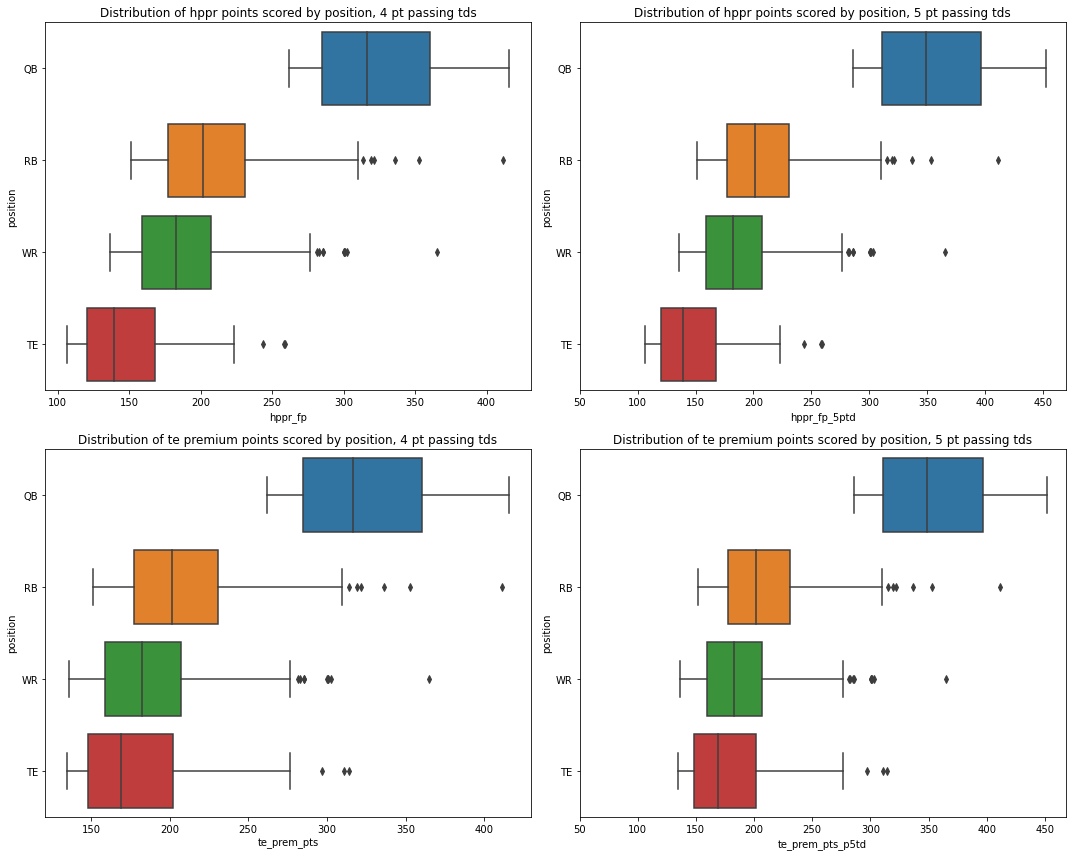

In [119]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = starter_df, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = starter_df, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='team_wins', ylabel='te_prem_pts_p5td'>

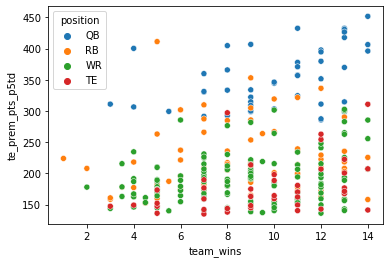

In [120]:
sns.scatterplot(data = starter_df, x = 'team_wins', y = 'te_prem_pts_p5td', hue = 'position')

<AxesSubplot:xlabel='team_wins', ylabel='te_prem_pts_p5td'>

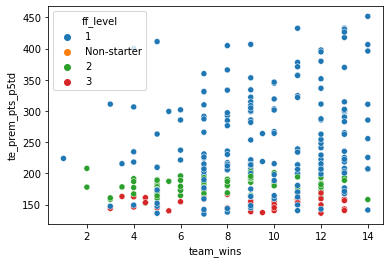

In [121]:
sns.scatterplot(data = starter_df, x = 'team_wins', y = 'te_prem_pts_p5td', hue = 'ff_level')

<AxesSubplot:xlabel='age', ylabel='te_prem_pts_p5td'>

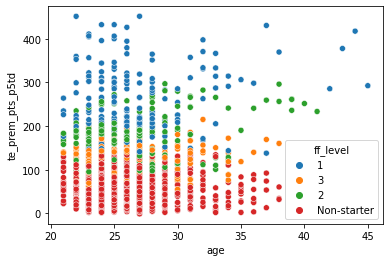

In [122]:
sns.scatterplot(data = ff_collective_sm, x = 'age', y = 'te_prem_pts_p5td', hue = 'ff_level')

TEs floors definitely increase, as do QBs wtih 5 pt passing tds; qbs go into almost a league of their own. similar to QBs in real nfl

In [123]:
ff_collective_sm['pos'] = ff_collective_sm['pos'].fillna(ff_collective_sm['position'])

In [124]:
ff_collective_sm['season'].value_counts()

### Seperating by position

# creating separate ff

ff_rb_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'RB']
ff_wr_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'WR']
ff_qb_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'QB']
ff_te_t = ff_collective_sm.loc[ff_collective_sm['pos'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_t = ff_rb_t.dropna(how = 'all', axis = 1)
ff_qb_t = ff_qb_t.dropna(how = 'all', axis = 1)
ff_wr_t = ff_wr_t.dropna(how = 'all', axis = 1)
ff_te_t = ff_te_t.dropna(how = 'all', axis = 1)

ff_rb_t.describe()

height      weight   years_exp         age           g          gs  \
count  354.000000  354.000000  354.000000  348.000000  348.000000  348.000000   
mean    70.813559  215.336158    2.932203   25.149425   12.778736    6.008621   
std      1.812527   12.118279    2.666747    2.752117    3.947042    5.585844   
min     66.000000  185.000000    0.000000   21.000000    1.000000    0.000000   
25%     70.000000  208.000000    1.000000   23.000000   11.000000    1.000000   
50%     71.000000  215.000000    2.000000   25.000000   14.000000    4.000000   
75%     72.000000  223.000000    4.000000   27.000000   16.000000   11.000000   
max     75.000000  250.000000   15.000000   37.000000   17.000000   17.000000   

              tgt         rec  passingyds   passingtd  passingatt  \
count  348.000000  348.000000  348.000000  348.000000  348.000000   
mean    31.465517   24.250000    0.477011    0.008621    0.074713   
std     24.942388   19.876365    3.716470    0.092580    0.379813   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000    9.000000    0.000000    0.000000    0.000000   
50%     25.500000   19.000000    0.000000    0.000000    0.000000   
75%     46.000000   36.000000    0.000000    0.000000    0.000000   
max    142.000000  116.000000   35.000000    1.000000    5.000000   

        rushingyds   rushingtd  rushingatt  receivingyds  receivingtd  \
count   348.000000  348.000000  348.000000    348.000000   348.000000   
mean    523.801724    3.879310  120.301724    182.235632     0.931034   
std     374.792497    3.743556   80.138557    160.528833     1.428755   
min       9.000000    0.000000    9.000000     -3.000000     0.000000   
25%     229.750000    1.000000   54.750000     60.750000     0.000000   
50%     445.000000    3.000000  101.000000    142.500000     0.000000   
75%     790.500000    6.000000  177.500000    263.750000     1.000000   
max    2027.000000   18.000000  378.000000   1005.000000     9.000000   

       fantasypoints         int     fumbles  fumbleslost         adp  \
count     348.000000  348.000000  348.000000   348.000000  208.000000   
mean      104.446322    0.011494    1.204023     0.706897   69.177885   
std        76.104853    0.106747    1.371293     0.957457   54.297820   
min         2.000000    0.000000    0.000000     0.000000    1.000000   
25%        45.750000    0.000000    0.000000     0.000000   23.250000   
50%        87.600000    0.000000    1.000000     0.000000   59.500000   
75%       148.250000    0.000000    2.000000     1.000000  104.000000   
max       469.200000    1.000000    7.000000     5.000000  222.000000   

          season_x     season_y  depth_team        cmp         ppr  \
count   354.000000   303.000000  303.000000  80.000000   80.000000   
mean   2020.483051  2020.471947    1.798680   0.050000  129.323750   
std       1.088698     1.100138    0.786306   0.270957   89.055379   
min    2019.000000  2019.000000    1.000000   0.000000    2.700000   
25%    2020.000000  2020.000000    1.000000   0.000000   57.300000   
50%    2020.000000  2020.000000    2.000000   0.000000  113.900000   
75%    2021.000000  2021.000000    2.000000   0.000000  192.400000   
max    2022.000000  2022.000000    3.000000   2.000000  372.700000   

             dkpt        fdpt         vbd       season  \
count   80.000000   80.000000   23.000000   581.000000   
mean   134.673750  116.667500   52.913043  2021.466437   
std     90.787543   80.552489   41.700134     1.494008   
min      2.700000    2.200000    3.000000  2019.000000   
25%     61.275000   51.925000   20.500000  2020.000000   
50%    118.250000  105.550000   40.000000  2022.000000   
75%    198.650000  170.525000   75.500000  2023.000000   
max    381.700000  319.200000  127.000000  2023.000000   

       avg_intended_air_yards  efficiency  \
count                  1.0000  353.000000   
mean                   4.0425    4.473698   
std                       NaN    2.466471   
min      

In [125]:
### Seperating by position

# creating separate ff

ff_rb_starter = starter_df.loc[starter_df['position'] == 'RB']
ff_wr_starter = starter_df.loc[starter_df['position'] == 'WR']
ff_qb_starter = starter_df.loc[starter_df['position'] == 'QB']
ff_te_starter = starter_df.loc[starter_df['position'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_starter = ff_rb_starter.dropna(how = 'all', axis = 1)
ff_qb_starter = ff_qb_starter.dropna(how = 'all', axis = 1)
ff_wr_starter = ff_wr_starter.dropna(how = 'all', axis = 1)
ff_te_starter = ff_te_starter.dropna(how = 'all', axis = 1)

In [126]:
# saving these new DFs

starter_df.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv")

ff_rb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_collective.csv")
ff_wr_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_collective.csv")
ff_qb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_collective.csv")
ff_te_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_collective.csv")

In [127]:
ff_rb_t.describe()

height      weight   years_exp         age           g          gs  \
count  354.000000  354.000000  354.000000  348.000000  348.000000  348.000000   
mean    70.813559  215.336158    2.932203   25.149425   12.778736    6.008621   
std      1.812527   12.118279    2.666747    2.752117    3.947042    5.585844   
min     66.000000  185.000000    0.000000   21.000000    1.000000    0.000000   
25%     70.000000  208.000000    1.000000   23.000000   11.000000    1.000000   
50%     71.000000  215.000000    2.000000   25.000000   14.000000    4.000000   
75%     72.000000  223.000000    4.000000   27.000000   16.000000   11.000000   
max     75.000000  250.000000   15.000000   37.000000   17.000000   17.000000   

              tgt         rec  passingyds   passingtd  passingatt  \
count  348.000000  348.000000  348.000000  348.000000  348.000000   
mean    31.465517   24.250000    0.477011    0.008621    0.074713   
std     24.942388   19.876365    3.716470    0.092580    0.379813   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000    9.000000    0.000000    0.000000    0.000000   
50%     25.500000   19.000000    0.000000    0.000000    0.000000   
75%     46.000000   36.000000    0.000000    0.000000    0.000000   
max    142.000000  116.000000   35.000000    1.000000    5.000000   

        rushingyds   rushingtd  rushingatt  receivingyds  receivingtd  \
count   348.000000  348.000000  348.000000    348.000000   348.000000   
mean    523.801724    3.879310  120.301724    182.235632     0.931034   
std     374.792497    3.743556   80.138557    160.528833     1.428755   
min       9.000000    0.000000    9.000000     -3.000000     0.000000   
25%     229.750000    1.000000   54.750000     60.750000     0.000000   
50%     445.000000    3.000000  101.000000    142.500000     0.000000   
75%     790.500000    6.000000  177.500000    263.750000     1.000000   
max    2027.000000   18.000000  378.000000   1005.000000     9.000000   

       fantasypoints         int     fumbles  fumbleslost         adp  \
count     348.000000  348.000000  348.000000   348.000000  208.000000   
mean      104.446322    0.011494    1.204023     0.706897   69.177885   
std        76.104853    0.106747    1.371293     0.957457   54.297820   
min         2.000000    0.000000    0.000000     0.000000    1.000000   
25%        45.750000    0.000000    0.000000     0.000000   23.250000   
50%        87.600000    0.000000    1.000000     0.000000   59.500000   
75%       148.250000    0.000000    2.000000     1.000000  104.000000   
max       469.200000    1.000000    7.000000     5.000000  222.000000   

          season_x     season_y  depth_team        cmp         ppr  \
count   354.000000   303.000000  303.000000  80.000000   80.000000   
mean   2020.483051  2020.471947    1.798680   0.050000  129.323750   
std       1.088698     1.100138    0.786306   0.270957   89.055379   
min    2019.000000  2019.000000    1.000000   0.000000    2.700000   
25%    2020.000000  2020.000000    1.000000   0.000000   57.300000   
50%    2020.000000  2020.000000    2.000000   0.000000  113.900000   
75%    2021.000000  2021.000000    2.000000   0.000000  192.400000   
max    2022.000000  2022.000000    3.000000   2.000000  372.700000   

             dkpt        fdpt         vbd       season  \
count   80.000000   80.000000   23.000000   581.000000   
mean   134.673750  116.667500   52.913043  2021.466437   
std     90.787543   80.552489   41.700134     1.494008   
min      2.700000    2.200000    3.000000  2019.000000   
25%     61.275000   51.925000   20.500000  2020.000000   
50%    118.250000  105.550000   40.000000  2022.000000   
75%    198.650000  170.525000   75.500000  2023.000000   
max    381.700000  319.200000  127.000000  2023.000000   

       avg_intended_air_yards  efficiency  \
count                  1.0000  353.000000   
mean                   4.0425    4.473698   
std                       NaN    2.466471   
min      

# Further dataset transformation

In [128]:
# let's aggregate and pivot each position 
# these will end up being

ff_rb_agg = ff_rb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_wr_agg = ff_wr_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_qb_agg = ff_qb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_te_agg = ff_te_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()

ff_rb_agg.head()

player_name  season  height  weight  years_exp   age     g    gs   tgt  \
0  A.J. Dillon  2020.0    72.0   250.0        0.0   NaN   NaN   NaN   NaN   
1  A.J. Dillon  2021.0    72.0   250.0        1.0   NaN   NaN   NaN   NaN   
2  A.J. Dillon  2022.0    72.0   250.0        2.0   NaN   NaN   NaN   NaN   
3  A.J. Dillon  2023.0     NaN     NaN        NaN   NaN   NaN   NaN   NaN   
4  Aaron Jones  2019.0    69.0   208.0        2.0  25.0  16.0  16.0  68.0   

    rec  passingyds  passingtd  passingatt  rushingyds  rushingtd  rushingatt  \
0   NaN         NaN        NaN         NaN         NaN        NaN         NaN   
1   NaN         NaN        NaN         NaN         NaN        NaN         NaN   
2   NaN         NaN        NaN         NaN         NaN        NaN         NaN   
3   NaN         NaN        NaN         NaN         NaN        NaN         NaN   
4  49.0         0.0        0.0         0.0      1084.0       16.0       236.0   

   receivingyds  receivingtd  fantasypoints  int  fumbles  fumbleslost    adp  \
0           NaN          NaN            NaN  NaN      NaN          NaN  129.0   
1           NaN          NaN            NaN  NaN      NaN          NaN   82.0   
2           NaN          NaN            NaN  NaN      NaN          NaN   46.0   
3           NaN          NaN            NaN  NaN      NaN          NaN    NaN   
4         474.0          3.0          314.8  0.0      3.0          2.0   28.0   

   season_x  season_y  depth_team  cmp  ppr  dkpt  fdpt  vbd  \
0    2020.0    2020.0         3.0  NaN  NaN   NaN   NaN  NaN   
1    2021.0    2021.0         2.0  NaN  NaN   NaN   NaN  NaN   
2    2022.0    2022.0         2.0  NaN  NaN   NaN   NaN  NaN   
3       NaN       NaN         NaN  NaN  NaN   NaN   NaN  NaN   
4    2019.0    2019.0         1.0  NaN  NaN   NaN   NaN  NaN   

   avg_intended_air_yards  efficiency  percent_attempts_gte_eight_defenders  \
0                     NaN    2.878952                             14.285714   
1                     NaN    3.493876                             22.324643   
2                     NaN    3.906207                             17.743840   
3                     NaN         NaN                                   NaN   
4                     NaN    5.027324                             20.654669   

   avg_time_to_los  expected_rush_yards  rush_yards_over_expected  \
0         2.611524           100.000554                 23.999446   
1         2.566363           130.675085                  9.524915   
2         2.594608           106.369996                 -1.062304   
3              NaN                  NaN                       NaN   
4         2.753791           121.527039                  8.972961   

   rush_yards_over_expected_per_att  rush_pct_over_expected  avg_cushion  \
0                          1.142831                0.523810          NaN   
1                          0.331090                0.496380          NaN   
2                         -0.129167                0.447654          NaN   
3                               NaN                     NaN          NaN   
4                          0.147533                0.392185          NaN   

   avg_separation  percent_share_of_intended_air_yards  catch_percentage  \
0             NaN                                  NaN               NaN   
1             NaN                                  NaN               NaN   
2             NaN                                  NaN               NaN   
3             NaN                                  NaN               NaN   
4             NaN                                  NaN               NaN   

   avg_yac  avg_expected_yac  avg_yac_above_expectation  player_id_y  \
0      NaN               NaN                        NaN          NaN   
1      NaN               NaN                        NaN          NaN   
2      NaN               NaN                        NaN          NaN   
3      NaN               NaN                        NaN          NaN   
4      NaN       

In [129]:
ff_rb_agg['season'] = ff_rb_agg['season'].astype('int')
ff_wr_agg['season'] = ff_wr_agg['season'].astype('int')
ff_qb_agg['season'] = ff_qb_agg['season'].astype('int')
ff_te_agg['season'] = ff_te_agg['season'].astype('int')

In [130]:
ff_rb_agg.describe()

season      height      weight   years_exp         age  \
count   581.000000  354.000000  354.000000  354.000000  348.000000   
mean   2021.466437   70.813559  215.336158    2.932203   25.149425   
std       1.494008    1.812527   12.118279    2.666747    2.752117   
min    2019.000000   66.000000  185.000000    0.000000   21.000000   
25%    2020.000000   70.000000  208.000000    1.000000   23.000000   
50%    2022.000000   71.000000  215.000000    2.000000   25.000000   
75%    2023.000000   72.000000  223.000000    4.000000   27.000000   
max    2023.000000   75.000000  250.000000   15.000000   37.000000   

                g          gs         tgt         rec  passingyds   passingtd  \
count  348.000000  348.000000  348.000000  348.000000  348.000000  348.000000   
mean    12.778736    6.008621   31.465517   24.250000    0.477011    0.008621   
std      3.947042    5.585844   24.942388   19.876365    3.716470    0.092580   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    1.000000   12.000000    9.000000    0.000000    0.000000   
50%     14.000000    4.000000   25.500000   19.000000    0.000000    0.000000   
75%     16.000000   11.000000   46.000000   36.000000    0.000000    0.000000   
max     17.000000   17.000000  142.000000  116.000000   35.000000    1.000000   

       passingatt   rushingyds   rushingtd  rushingatt  receivingyds  \
count  348.000000   348.000000  348.000000  348.000000    348.000000   
mean     0.074713   523.801724    3.879310  120.301724    182.235632   
std      0.379813   374.792497    3.743556   80.138557    160.528833   
min      0.000000     9.000000    0.000000    9.000000     -3.000000   
25%      0.000000   229.750000    1.000000   54.750000     60.750000   
50%      0.000000   445.000000    3.000000  101.000000    142.500000   
75%      0.000000   790.500000    6.000000  177.500000    263.750000   
max      5.000000  2027.000000   18.000000  378.000000   1005.000000   

       receivingtd  fantasypoints         int     fumbles  fumbleslost  \
count   348.000000     348.000000  348.000000  348.000000   348.000000   
mean      0.931034     104.446322    0.011494    1.204023     0.706897   
std       1.428755      76.104853    0.106747    1.371293     0.957457   
min       0.000000       2.000000    0.000000    0.000000     0.000000   
25%       0.000000      45.750000    0.000000    0.000000     0.000000   
50%       0.000000      87.600000    0.000000    1.000000     0.000000   
75%       1.000000     148.250000    0.000000    2.000000     1.000000   
max       9.000000     469.200000    1.000000    7.000000     5.000000   

              adp     season_x     season_y  depth_team        cmp  \
count  208.000000   354.000000   303.000000  303.000000  80.000000   
mean    69.177885  2020.483051  2020.471947    1.798680   0.050000   
std     54.297820     1.088698     1.100138    0.786306   0.270957   
min      1.000000  2019.000000  2019.000000    1.000000   0.000000   
25%     23.250000  2020.000000  2020.000000    1.000000   0.000000   
50%     59.500000  2020.000000  2020.000000    2.000000   0.000000   
75%    104.000000  2021.000000  2021.000000    2.000000   0.000000   
max    222.000000  2022.000000  2022.000000    3.000000   2.000000   

              ppr        dkpt        fdpt         vbd  avg_intended_air_yards  \
count   80.000000   80.000000   80.000000   23.000000                  1.0000   
mean   129.323750  134.673750  116.667500   52.913043                  4.0425   
std     89.055379   90.787543   80.552489   41.700134                     NaN   
min      2.700000    2.700000    2.200000    3.000000                  4.0425   
25%     57.300000   61.275000   51.925000   20.500000                  4.0425   
50%    113.900000  118.250000  105.550000   40.000000                  4.0425   
75%    192.400000  198.650000  170.525000   75.500000                  4.0425   
max    372.700000  381.700000  319.200000  127.000000   

In [131]:
# creating pivot table using 'player_name' as the index, 'season' as the columns, 
# and aggregate the stats 
# Create a dictionary of dataframes
dataframes = {
    'ff_rb_agg': ff_rb_agg,
    'ff_wr_agg': ff_wr_agg,
    'ff_qb_agg': ff_qb_agg,
    'ff_te_agg': ff_te_agg
}

# Create empty dictionaries to store the wide dataframes
rb_wide = {}
wr_wide = {}
qb_wide = {}
te_wide = {}

# Iterate over the dataframes dictionary
for name, df in dataframes.items():
    # Pivot the dataframe
    wide_df = pd.pivot_table(df, index='player_name', columns='season', aggfunc='sum')
    
    # Reset the column index to remove the multi-level column hierarchy
    wide_df.columns = [f'{col[0]}_{col[1]}' for col in wide_df.columns]
    
    # Save the wide dataframe to the corresponding variable
    if name == 'ff_rb_agg':
        rb_wide = wide_df
    elif name == 'ff_wr_agg':
        wr_wide = wide_df
    elif name == 'ff_qb_agg':
        qb_wide = wide_df
    elif name == 'ff_te_agg':
        te_wide = wide_df




rb_wide.head()


1std_2019  1std_2020  1std_2021  1std_2022  1std_2023  \
player_name                                                              
A.J. Dillon            NaN      358.0      375.0      334.0        0.0   
Aaron Jones          320.0      358.0      375.0      334.0        0.0   
Aaron Shampklin        NaN        NaN        NaN        NaN        0.0   
Adam Prentice          NaN        NaN        NaN        NaN        0.0   
Adrian Peterson        0.0      350.0      302.0        NaN        NaN   

                 adp_2019  adp_2020  adp_2021  adp_2022  adp_2023  age_2019  \
player_name                                                                   
A.J. Dillon           NaN     129.0      82.0      46.0       0.0       NaN   
Aaron Jones          28.0      18.0       6.0      16.0       0.0      25.0   
Aaron Shampklin       NaN       NaN       NaN       NaN       0.0       NaN   
Adam Prentice         NaN       NaN       NaN       NaN       0.0       NaN   
Adrian Peterson     105.0     116.0       0.0       NaN       NaN      34.0   

                 age_2020  age_2021  age_2022  age_2023  avg_cushion_2019  \
player_name                                                                 
A.J. Dillon           0.0       0.0       0.0       0.0               NaN   
Aaron Jones          26.0      27.0      28.0       0.0               0.0   
Aaron Shampklin       NaN       NaN       NaN       0.0               NaN   
Adam Prentice         NaN       NaN       NaN       0.0               NaN   
Adrian Peterson      35.0      36.0       NaN       NaN               0.0   

                 avg_cushion_2020  avg_cushion_2021  avg_cushion_2022  \
player_name                                                             
A.J. Dillon                   0.0               0.0               0.0   
Aaron Jones                   0.0               0.0               0.0   
Aaron Shampklin               NaN               NaN               NaN   
Adam Prentice                 NaN               NaN               NaN   
Adrian Peterson               0.0               0.0               NaN   

                 avg_cushion_2023  avg_expected_yac_2019  \
player_name                                                
A.J. Dillon                   0.0                    NaN   
Aaron Jones                   0.0                    0.0   
Aaron Shampklin               0.0                    NaN   
Adam Prentice                 0.0                    NaN   
Adrian Peterson               NaN                    0.0   

                 avg_expected_yac_2020  avg_expected_yac_2021  \
player_name                                                     
A.J. Dillon                        0.0                    0.0   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    NaN   
Adam Prentice                      NaN                    NaN   
Adrian Peterson                    0.0                    0.0   

                 avg_expected_yac_2022  avg_expected_yac_2023  \
player_name                                                     
A.J. Dillon                        0.0                    0.0   
Aaron Jones                        0.0                    0.0   
Aaron Shampklin                    NaN                    0.0   
Adam Prentice                      NaN                    0.0   
Adrian Peterson                    NaN                    NaN   

                 avg_intended_air_yards_2019  avg_intended_air_yards_2020  \
player_name                                                                 
A.J. Dillon                              NaN                          0.0   
Aaron Jones                              0.0                          0.0   
Aaron Shampklin                          NaN                          NaN   
Adam Prentice                            NaN                          NaN   
Adrian Peterson                          0.0                          0.0   

                 av

In [132]:
print('QB Wide Dimensions: ', qb_wide.shape,
      'RB Wide Dimensions: ', rb_wide.shape,
      'WR Wide dimensions: ', wr_wide.shape, 
      'TE Wide Dimensions: ', te_wide.shape)

QB Wide Dimensions:  (150, 570) RB Wide Dimensions:  (285, 565) WR Wide dimensions:  (506, 605) TE Wide Dimensions:  (246, 530)


In [133]:
qb_wide.describe()

1std_2019   1std_2020   1std_2021   1std_2022  1std_2023    adp_2019  \
count   57.000000   59.000000   62.000000   67.000000      124.0   57.000000   
mean   293.526316  302.983051  317.596774  307.402985        0.0   43.842105   
std     97.138176  115.765591   90.823457   84.094474        0.0   60.283790   
min      0.000000    0.000000    0.000000    0.000000        0.0    0.000000   
25%    297.000000  310.000000  307.000000  294.000000        0.0    0.000000   
50%    314.000000  336.000000  331.500000  334.000000        0.0    0.000000   
75%    341.000000  365.000000  361.000000  347.000000        0.0   93.000000   
max    386.000000  397.000000  419.000000  408.000000        0.0  183.000000   

         adp_2020    adp_2021    adp_2022  adp_2023   age_2019   age_2020  \
count   59.000000   62.000000   67.000000     124.0  57.000000  59.000000   
mean    46.220339   45.338710   15.970149       0.0  28.052632  28.881356   
std     64.679333   65.490819   32.551577       0.0   6.583044   5.317780   
min      0.000000    0.000000    0.000000       0.0   0.000000  22.000000   
25%      0.000000    0.000000    0.000000       0.0  24.000000  24.500000   
50%      0.000000    0.000000    0.000000       0.0  27.000000  27.000000   
75%     93.000000   84.500000    0.000000       0.0  32.000000  32.000000   
max    189.000000  216.000000  117.000000       0.0  42.000000  43.000000   

        age_2021   age_2022  age_2023  aggressiveness_2019  \
count  62.000000  67.000000     124.0            57.000000   
mean   28.032258  27.447761       0.0            17.092316   
std     6.166987   5.708270       0.0             3.483165   
min     0.000000   0.000000       0.0            11.857661   
25%    24.000000  24.000000       0.0            14.902159   
50%    28.000000  27.000000       0.0            16.418670   
75%    32.000000  30.000000       0.0            19.047619   
max    44.000000  45.000000       0.0            28.279450   

       aggressiveness_2020  aggressiveness_2021  aggressiveness_2022  \
count            59.000000            62.000000            67.000000   
mean             16.534399            15.494393            15.622980   
std               6.048685             3.982017             5.294728   
min               5.555556             6.250000             5.246008   
25%              12.969626            12.882204            12.533953   
50%              15.714040            15.420323            15.030946   
75%              19.635506            17.781036            17.772324   
max              37.500000            27.586207            36.842105   

       aggressiveness_2023  attempts_2019  attempts_2020  attempts_2021  \
count                124.0      57.000000      59.000000      62.000000   
mean                   0.0      52.576885      51.912749      49.888306   
std                    0.0      16.387567      17.761644      17.195461   
min                    0.0      21.000000      15.000000      16.000000   
25%                    0.0      42.857143      37.333333      31.083333   
50%                    0.0      56.800000      57.800000      55.466667   
75%                    0.0      66.800000      65.523529      63.312500   
max                    0.0      77.000000      76.000000      79.888889   

       attempts_2022  attempts_2023  avg_air_distance_2019  \
count      67.000000          124.0              57.000000   
mean       47.611140            0.0              20.936093   
std        17.679041            0.0               1.112731   
min        15.000000            0.0              17.139997   
25%        30.500000            0.0              20.181904   
50%        50.000000            0.0              20.989895   
75%        61.375000            0.0              21.594706   
max        81.444444            0.0              23.552250   

       avg_air_distance_2020  avg_air_distance_2021  avg_air_distance_2022  \
count              59.000000              62.000000              67.0000

In [134]:
# filling 0s in age

ages = ['age_2019', 'age_2020', 'age_2021', 'age_2022']
dfs = [qb_wide, rb_wide, wr_wide, te_wide]

for i in dfs:
    i[ages] = i[ages].replace(0, np.nan)
    
    # filling in upwards
    i['age_2020'] = i['age_2020'].fillna(i['age_2019'].add(1))
    i['age_2021'] = i['age_2021'].fillna(i['age_2020'].add(1))
    i['age_2022'] = i['age_2022'].fillna(i['age_2021'].add(1))
    

    # filling downwards
    i['age_2021'] = i['age_2021'].fillna(i['age_2022'].sub(1))
    i['age_2020'] = i['age_2020'].fillna(i['age_2021'].sub(1))
    i['age_2019'] = i['age_2019'].fillna(i['age_2020'].sub(1))
    
    # creating column for 2023 age
    i['age_2023'] = i['age_2022'] + 1


In [135]:
# filling 0s in adp with null

adps = ['adp_2019', 'adp_2020', 'adp_2021', 'adp_2022']

for i in dfs:
    i[adps] = i[adps].replace(0, np.nan)


In [136]:
qb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv")
rb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv")
wr_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv")
te_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv")

## Filtering Data

Text(0.5, 1.0, 'Distribution of games started')

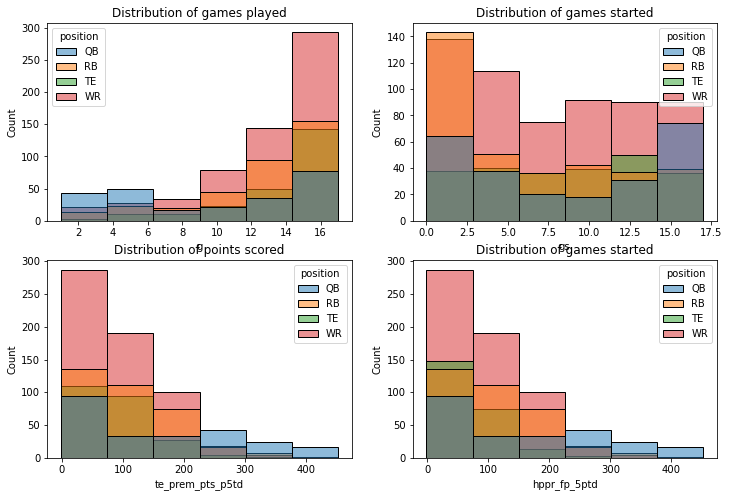

In [137]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0, 0], hue = 'position', bins = 6)
axes[0, 0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[0, 1], hue = 'position', bins  = 6)
axes[0, 1].set_title('Distribution of games started')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 0], hue = 'position', bins  = 6)
axes[1, 0].set_title('Distribution of points scored')

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[1, 1], hue = 'position', bins  = 6)
axes[1, 1].set_title('Distribution of games started')


In [138]:
print('Percentiles by season: \n', ff_collective_sm.groupby('season')['te_prem_pts_p5td'].quantile([.1, .2, .3, .4, .5, .55, .6]),
      '\n\n Overall Percentiles:\n', ff_collective_sm['te_prem_pts_p5td'].quantile([.1, .2, .3, .4, .5, .55, .6]))

Percentiles by season: 
 season      
2019.0  0.10     17.000
        0.20     33.420
        0.30     48.200
        0.40     67.420
        0.50     85.300
        0.55     95.020
        0.60    109.240
2020.0  0.10     18.216
        0.20     33.080
        0.30     52.910
        0.40     69.404
        0.50     83.350
        0.55     95.025
        0.60    114.036
2021.0  0.10     19.160
        0.20     35.500
        0.30     50.280
        0.40     65.020
        0.50     81.100
        0.55     92.100
        0.60    107.040
2022.0  0.10     19.680
        0.20     35.800
        0.30     50.400
        0.40     68.000
        0.50     85.550
        0.55     93.265
        0.60    108.200
2023.0  0.10        NaN
        0.20        NaN
        0.30        NaN
        0.40        NaN
        0.50        NaN
        0.55        NaN
        0.60        NaN
Name: te_prem_pts_p5td, dtype: float64 

 Overall Percentiles:
 0.10     18.80
0.20     33.90
0.30     50.00
0.40     66.9

In [139]:
print('Percentiles of games played by season: \n', ff_collective_sm.groupby('season')['g'].quantile([.1, .2, .25, .3, .35, .4]),
      '\n Percentiles of games played overall: \n', ff_collective_sm['g'].quantile([.1, .2, .25, .3, .35, .4]))

Percentiles of games played by season: 
 season      
2019.0  0.10     5.0
        0.20     9.0
        0.25    10.0
        0.30    11.0
        0.35    12.0
        0.40    13.0
2020.0  0.10     5.0
        0.20     9.0
        0.25    10.0
        0.30    11.0
        0.35    12.0
        0.40    13.0
2021.0  0.10     6.0
        0.20     9.0
        0.25    10.0
        0.30    12.0
        0.35    12.0
        0.40    13.0
2022.0  0.10     5.0
        0.20     9.0
        0.25    10.0
        0.30    12.0
        0.35    13.0
        0.40    13.0
2023.0  0.10     NaN
        0.20     NaN
        0.25     NaN
        0.30     NaN
        0.35     NaN
        0.40     NaN
Name: g, dtype: float64 
 Percentiles of games played overall: 
 0.10     5.0
0.20     9.0
0.25    10.0
0.30    11.0
0.35    12.0
0.40    13.0
Name: g, dtype: float64


For a cut off, to try to take the players that have an impact on fantasy and play at least a decent amount of games, the median for points (33.4) and 25th percentile for games played (6). These stay pretty consistent as the median for each season, as well.

In [140]:
## Filtering data 

## first, getting rid of those null columns of players without stats for a given year

ff_collective_sm = ff_collective_sm.dropna(subset = ['tm', 'g', 'gs'])

## setting a filter for g 

ff_collective_sm = ff_collective_sm.loc[ff_collective['g'] >= 6]


# filtering for top 50% of fantasy points


ff_collective_sm = ff_collective_sm.loc[ff_collective_sm['te_prem_pts_p5td'] >= (ff_collective_sm['te_prem_pts_p5td'].quantile(.5))]

Text(0.5, 1.0, 'Distribution of hppr points scored')

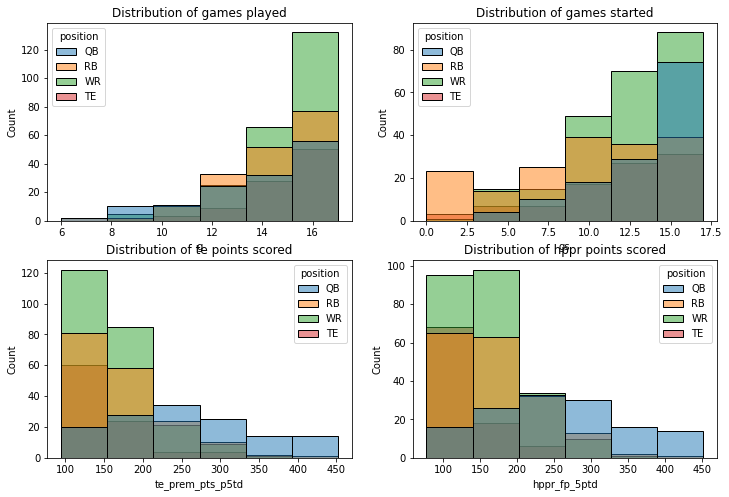

In [141]:
# let's re-visualize this data with these filters

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0, 0], hue = 'position', bins = 6)
axes[0, 0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[0, 1], hue = 'position', bins  = 6)
axes[0, 1].set_title('Distribution of games started')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 0], hue = 'position', bins  = 6)
axes[1, 0].set_title('Distribution of te points scored')

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[1, 1], hue = 'position', bins  = 6)
axes[1, 1].set_title('Distribution of hppr points scored')

In [142]:
ff_collective_sm.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv")